In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [197]:
df = pd.read_csv('../../stacked_inner_pollution_data.csv')

/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,5,6,7,8,10,11,14,16,17,18,19,20,21,22,23,24,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [198]:
df.head()

Date      Time                       Location  Carbon monoxide  \
0  2004-01-01  01:00:00       Ealing - Acton Town Hall          0.81494   
1  2004-01-01  01:00:00      Ealing - Ealing Town Hall              NaN   
2  2004-01-01  01:00:00  Ealing - Hanger Lane Gyratory              NaN   
3  2004-01-01  02:00:00       Ealing - Acton Town Hall          0.93136   
4  2004-01-01  02:00:00      Ealing - Ealing Town Hall              NaN   

  Nitric Oxide Nitrogen dioxide Non-volatile PM10 Non-volatile PM2.5  \
0          NaN            35.19               NaN                NaN   
1          NaN          18.5512               NaN                NaN   
2          NaN          46.8563               NaN                NaN   
3          NaN           17.595               NaN                NaN   
4          NaN          11.0925               NaN                NaN   

  Oxides of Nitrogen     Ozone  ... Status.2       Status.3  Status.4  \
0                NaN       NaN  ...  V mgm-3  V ugm-3 (VCM)   V ugm-3   
1                NaN  39.91400  ...  V ugm-3            NaN       NaN   
2                NaN       NaN  ...      NaN            NaN       NaN   
3                NaN       NaN  ...  V mgm-3  V ugm-3 (VCM)   V ugm-3   
4                NaN  54.48261  ...  V ugm-3            NaN       NaN   

   Status.5 Status.6  Status.7 Status.8 Status.9 Sulphur dioxide Volatile PM10  
0       NaN      NaN       NaN      NaN      NaN             NaN           NaN  
1       NaN      NaN       NaN      NaN      NaN        14.10277           NaN  
2       NaN      NaN       NaN      NaN      NaN             NaN           NaN  
3       NaN      NaN       NaN      NaN      NaN             NaN           NaN  
4       NaN      NaN       NaN      NaN      NaN        14.10277           NaN  

[5 rows x 31 columns]

## Units

PM10 Particulae Matter  --->   R ugm-3 (INDIC.GRAV)

Nitric Oxide  ---> R ugm-3

Nitrogen Dioxide ---> R ugm-3

Oxides of Nitrogen ---> R ugm-3

Sulpher Dioxide ---> R ugm-3

Non-volatile PM10 ---> R ugm-3 (INDIC.GRAV)

Non-volatile PM2.5 ---> R ugm-3

Ozone ---> R ugm-3

### Dropping units columns

In [199]:
unit_cols = [c for c in df.columns if "Status" in c]

In [200]:
df = df.drop(columns = unit_cols)

In [201]:
df['Date'] = pd.to_datetime(df['Date'])

In [202]:
cols = df.columns.drop(['Date', 'Time', 'Location'])
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [203]:
df.dtypes

Date                                          datetime64[ns]
Time                                                  object
Location                                              object
Carbon monoxide                                      float64
Nitric Oxide                                         float64
Nitrogen dioxide                                     float64
Non-volatile PM10                                    float64
Non-volatile PM2.5                                   float64
Oxides of Nitrogen                                   float64
Ozone                                                float64
PM1 Particulates                                     float64
PM10 Particulate matter                              float64
PM10 particulate matter (Hourly measured)            float64
PM2.5 Particulate matter                             float64
PM2.5 Particulate matter.1                           float64
PM2.5 particulate matter (Hourly measured)           float64
Sulphur dioxide         

In [204]:
df_hourly = df.copy()

In [780]:
df_daily = df_hourly.groupby(['Date', 'Location']).mean().reset_index()

In [781]:
df_daily.head()

Date                          Location  Carbon monoxide  Nitric Oxide  \
0 2004-01-01             Hounslow 2 - Cranford              NaN      4.130435   
1 2004-01-01   Hounslow 4 - Chiswick High Road              NaN     27.666667   
2 2004-01-01                Hounslow Brentford         0.558333     25.541667   
3 2004-01-01          Ealing - Acton Town Hall         0.834343           NaN   
4 2004-01-01         Ealing - Ealing Town Hall              NaN           NaN   

   Nitrogen dioxide  Non-volatile PM10  Non-volatile PM2.5  \
0         22.652174                NaN                 NaN   
1         47.875000                NaN                 NaN   
2         25.916667                NaN                 NaN   
3         38.106562                NaN                 NaN   
4         25.747031                NaN                 NaN   

   Oxides of Nitrogen     Ozone  PM1 Particulates  PM10 Particulate matter  \
0           28.565217       NaN               NaN                10.208333   
1           90.250000       NaN               NaN                21.416667   
2           65.083333       NaN               NaN                13.000000   
3                 NaN       NaN               NaN                      NaN   
4                 NaN  37.01192               NaN                      NaN   

   PM10 particulate matter (Hourly measured)  PM2.5 Particulate matter  \
0                                        NaN                       NaN   
1                                        NaN                       NaN   
2                                        NaN                       NaN   
3                                  22.454167                       NaN   
4                                        NaN                       NaN   

   PM2.5 Particulate matter.1  PM2.5 particulate matter (Hourly measured)  \
0                         NaN                                         NaN   
1                         NaN                                         NaN   
2                         NaN                                         NaN   
3                         NaN                                    8.258333   
4                         NaN                                         NaN   

   Sulphur dioxide  Volatile PM10  
0         1.000000            NaN  
1         1.583333            NaN  
2              NaN            NaN  
3              NaN            NaN  
4        13.304500            NaN

### Adding extra data

In [207]:
bucks = pd.read_csv('./buckinghamshire.csv').drop('Unnamed: 0', axis = 1)

In [782]:
bucks['Date'] = pd.to_datetime(bucks['Date'])

In [783]:
bucks

Date                 Location  Carbon monoxide  Nitric Oxide  \
0   2020-01-07  Iver Thorney Lane North         0.085327     24.927935   
1   2020-01-08  Iver Thorney Lane North         0.056837     77.523488   
2   2020-01-09  Iver Thorney Lane North         0.186719     36.239473   
3   2020-01-10     Iver North Park Road         0.113701     32.280221   
4   2020-01-10      Iver Primary School         0.098636     28.958236   
..         ...                      ...              ...           ...   
279 2020-07-31  Iver Thorney Lane North         0.192375     49.674959   
280 2020-08-31  Iver Thorney Lane North         0.150557     19.056304   
281 2020-10-31     Iver North Park Road         0.124229     17.950807   
282 2020-10-31      Iver Primary School         0.091076     10.031302   
283 2020-10-31  Iver Thorney Lane North         0.113830     10.568008   

     Nitrogen dioxide       Ozone  PM10 Particulate matter  
0           20.808086   16.418491                15.616667  
1           22.435314   85.781597                15.317391  
2           52.484013   40.755325                31.295833  
3           35.080548   73.014685                18.429167  
4           30.729802   79.113960                19.345833  
..                ...         ...                      ...  
279         82.573386  113.716481                65.434783  
280         36.064335   16.233253                15.150000  
281         21.797411   88.617845                 3.729167  
282         14.964321   42.070168                 8.787500  
283         13.731215   56.299799                12.358333  

[284 rows x 7 columns]

In [674]:
extra = pd.read_csv('../../extra.csv').drop('Unnamed: 0', axis = 1)

In [784]:
extra['Date'] = pd.to_datetime(extra['Date'])

In [785]:
extra = extra.rename({'Nitric oxide': 'Nitric Oxide'}, axis=1) 

In [786]:
extra

Date                                  Location  Carbon monoxide  \
0     2004-01-01             Elmbridge - Bell Farm Hersham         0.125000   
1     2004-01-01             Reigate and Banstead - Horley              NaN   
2     2005-01-01             Elmbridge - Bell Farm Hersham         0.026087   
3     2005-01-01             Reigate and Banstead - Horley              NaN   
4     2006-01-01             Elmbridge - Bell Farm Hersham         0.291667   
...          ...                                       ...              ...   
49050 2019-12-31  Reigate and Banstead - Horley South East              NaN   
49051 2019-12-31    Reigate and Banstead - Reigate High St              NaN   
49052 2019-12-31                               SODC Henley              NaN   
49053 2019-12-31                          SODC Wallingford              NaN   
49054 2019-12-31                           SODC Watlington              NaN   

       Nitric Oxide  Nitrogen dioxide      Ozone  \
0               NaN         12.820833  40.804165   
1               NaN         21.340313        NaN   
2               NaN          9.465218        NaN   
3               NaN         29.858906        NaN   
4               NaN         23.241667  32.266666   
...             ...               ...        ...   
49050           NaN         35.296387        NaN   
49051           NaN         39.173935        NaN   
49052           NaN         21.162416        NaN   
49053           NaN         35.958332        NaN   
49054           NaN         27.550000        NaN   

       PM10 particulate matter (Hourly measured)  Sulphur dioxide  
0                                            NaN         0.369565  
1                                            NaN              NaN  
2                                       9.852174              NaN  
3                                            NaN              NaN  
4                                       8.787500         2.466667  
...                                          ...              ...  
49050                                        NaN              NaN  
49051                                        NaN              NaN  
49052                                        NaN              NaN  
49053                                        NaN              NaN  
49054                                        NaN              NaN  

[49055 rows x 8 columns]

In [787]:
extra_daily = extra.groupby(['Date', 'Location']).mean().reset_index()

In [788]:
extra_daily

Date                                  Location  Carbon monoxide  \
0     2004-01-01             Elmbridge - Bell Farm Hersham         0.125000   
1     2004-01-01             Reigate and Banstead - Horley              NaN   
2     2004-01-02             Elmbridge - Bell Farm Hersham         0.083333   
3     2004-01-02             Reigate and Banstead - Horley              NaN   
4     2004-01-03             Elmbridge - Bell Farm Hersham         0.862500   
...          ...                                       ...              ...   
49050 2020-12-11             Reigate and Banstead - Horley              NaN   
49051 2020-12-11  Reigate and Banstead - Horley South East              NaN   
49052 2020-12-11    Reigate and Banstead - Reigate High St              NaN   
49053 2020-12-11                               SODC Henley              NaN   
49054 2020-12-11                          SODC Wallingford              NaN   

       Nitric Oxide  Nitrogen dioxide      Ozone  \
0               NaN         12.820833  40.804165   
1               NaN         21.340313        NaN   
2               NaN          5.433333  52.937500   
3               NaN         37.971092        NaN   
4               NaN         72.995834  19.666666   
...             ...               ...        ...   
49050           NaN               NaN  14.879167   
49051           NaN         17.247791        NaN   
49052           NaN         19.146423        NaN   
49053           NaN         22.388247        NaN   
49054           NaN         44.458332        NaN   

       PM10 particulate matter (Hourly measured)  Sulphur dioxide  
0                                            NaN         0.369565  
1                                            NaN              NaN  
2                                            NaN         0.666667  
3                                            NaN              NaN  
4                                            NaN         5.308696  
...                                          ...              ...  
49050                                  10.095833              NaN  
49051                                        NaN              NaN  
49052                                        NaN              NaN  
49053                                        NaN              NaN  
49054                                        NaN              NaN  

[49055 rows x 8 columns]

In [789]:
df_daily = pd.concat([df_daily, bucks, extra_daily])

In [790]:
pollutants = ['Carbon monoxide', 'Nitric Oxide',
       'Nitrogen dioxide', 'Non-volatile PM10', 'Non-volatile PM2.5',
       'Oxides of Nitrogen', 'Ozone', 'PM1 Particulates',
       'PM10 Particulate matter', 'PM10 particulate matter (Hourly measured)',
       'PM2.5 Particulate matter', 'PM2.5 Particulate matter.1',
       'PM2.5 particulate matter (Hourly measured)', 'Sulphur dioxide',
       'Volatile PM10']

In [778]:
# pollutants = ['Carbon monoxide', 'Ozone',
#        'PM10 particulate matter (Hourly measured)', 'PM2.5 Particulate matter',
#        'PM2.5 particulate matter (Hourly measured)', 'Sulphur dioxide',
#        'Volatile PM10', ]

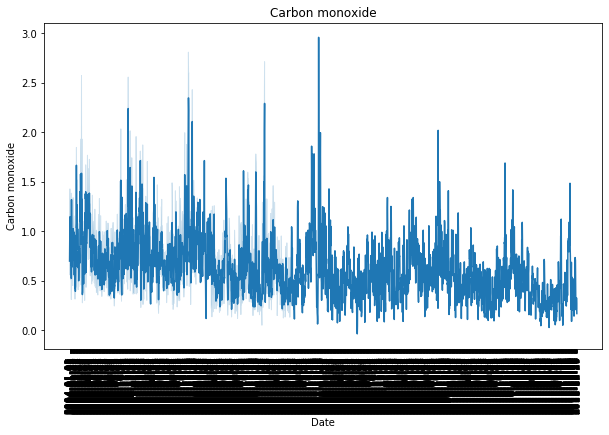

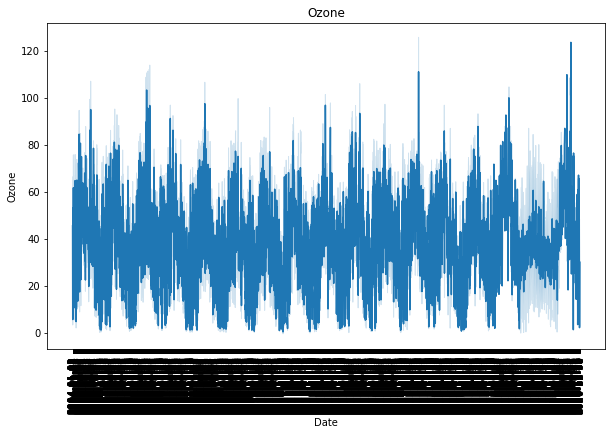

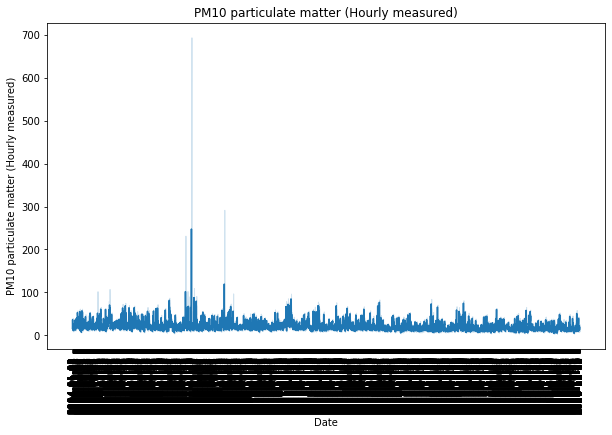

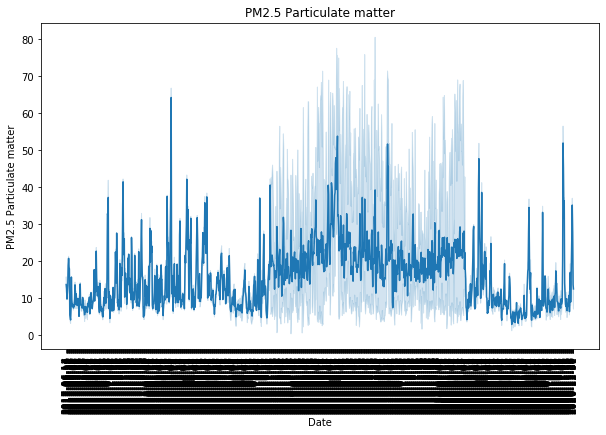

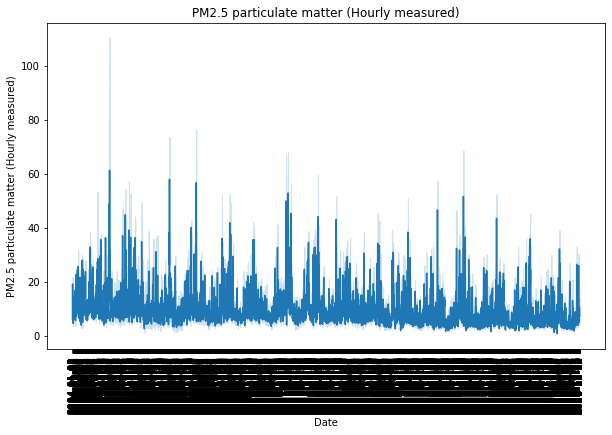

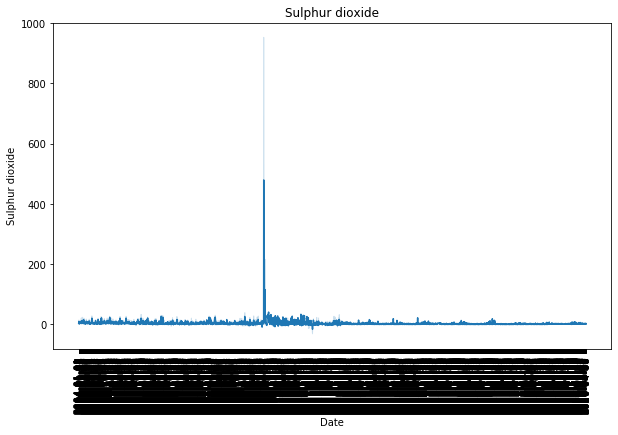

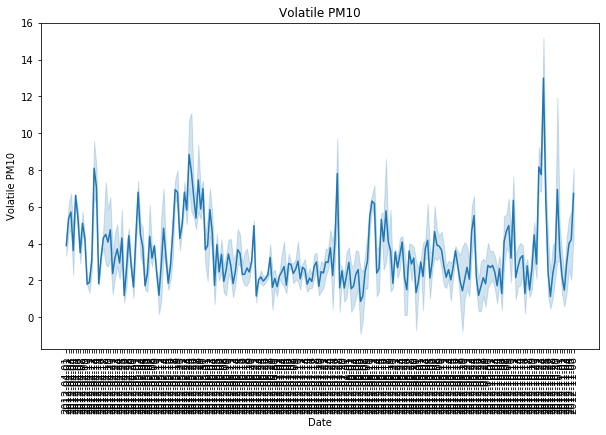

In [30]:
for p in pollutants:
    plt.figure(figsize=(10, 6))
    sns.lineplot(y= p ,
                 x='Date',
                 data=df_daily).set_title(p)
    plt.xticks(rotation=90)
    plt.show()

In [791]:
df_monthly = df_daily.groupby(['Location', pd.Grouper(key='Date', freq='M')]).mean().reset_index()
df_quaterly = df_daily.groupby(['Location', pd.Grouper(key='Date', freq='Q')]).mean().reset_index()
df_yearly = df_daily.groupby(['Location', pd.Grouper(key='Date', freq='Y')]).mean().reset_index()
df_yearly.head()

Location       Date  Carbon monoxide  Nitric Oxide  \
0   Hounslow 2 - Cranford 2004-12-31              NaN     19.366907   
1   Hounslow 2 - Cranford 2005-12-31              NaN     19.282252   
2   Hounslow 2 - Cranford 2006-12-31              NaN     16.322724   
3   Hounslow 2 - Cranford 2007-12-31              NaN     22.751626   
4   Hounslow 2 - Cranford 2008-12-31              NaN     19.463412   

   Nitrogen dioxide  Non-volatile PM10  Non-volatile PM2.5  \
0         35.637110                NaN                 NaN   
1         37.730687                NaN                 NaN   
2         37.439653                NaN                 NaN   
3         34.516199                NaN                 NaN   
4         36.025263                NaN                 NaN   

   Oxides of Nitrogen      Ozone  PM1 Particulates  PM10 Particulate matter  \
0           65.183649  31.628426               NaN                22.091612   
1           66.993132  34.426010               NaN                22.159977   
2           62.493307  41.626836               NaN                22.695308   
3           69.260681  31.764437               NaN                21.877800   
4           65.728967  36.527434               NaN                19.221030   

   PM10 particulate matter (Hourly measured)  PM2.5 Particulate matter  \
0                                        NaN                       NaN   
1                                        NaN                       NaN   
2                                        NaN                       NaN   
3                                        NaN                       NaN   
4                                        NaN                       NaN   

   PM2.5 Particulate matter.1  PM2.5 particulate matter (Hourly measured)  \
0                         NaN                                         NaN   
1                         NaN                                         NaN   
2                         NaN                                         NaN   
3                         NaN                                         NaN   
4                         NaN                                         NaN   

   Sulphur dioxide  Volatile PM10  
0         3.611565            NaN  
1         3.959997            NaN  
2         3.018580            NaN  
3         2.886371            NaN  
4         3.046298            NaN

### Monthly pollution levels from 2004 - 2020

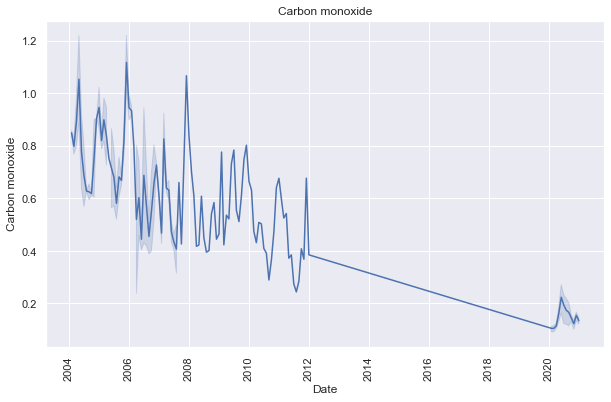

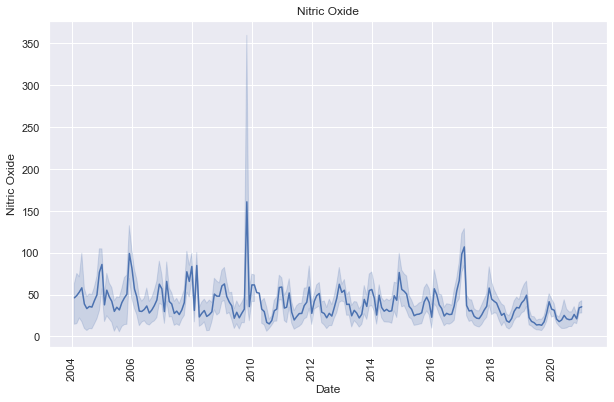

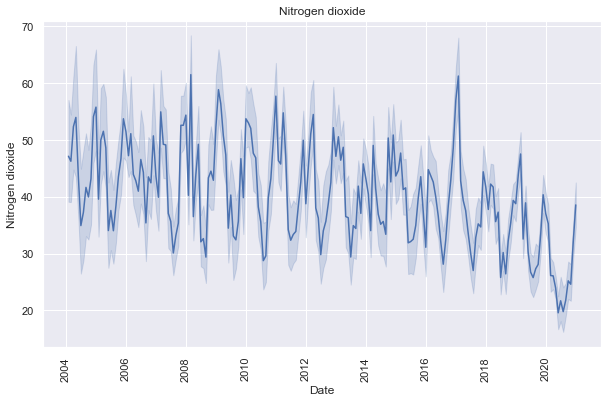

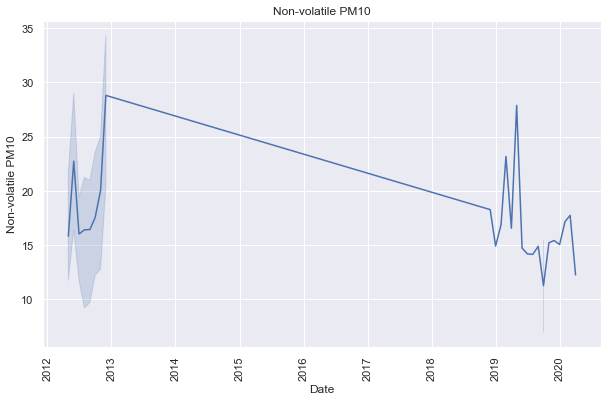

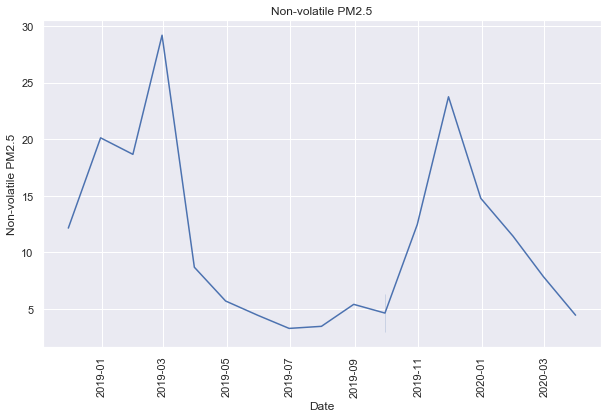

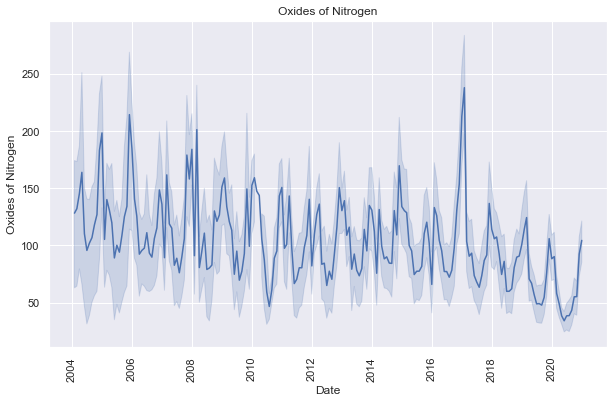

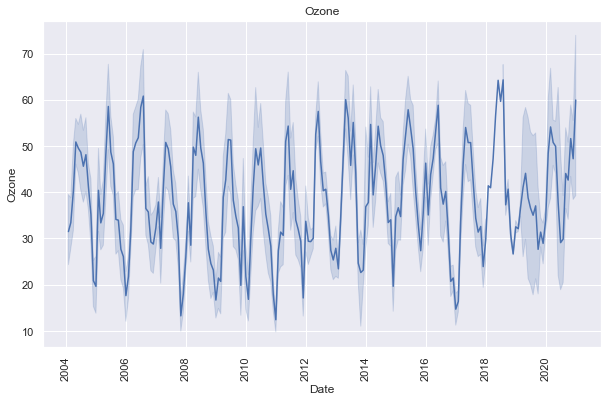

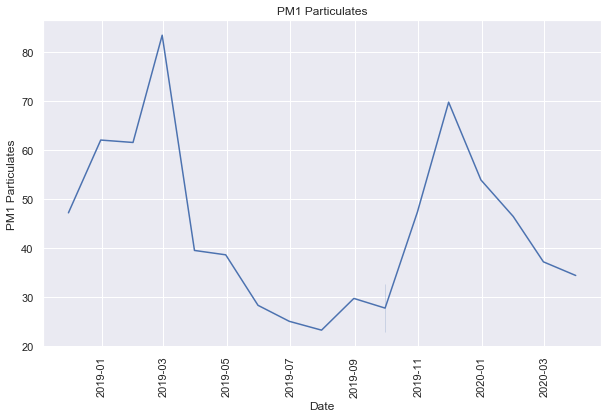

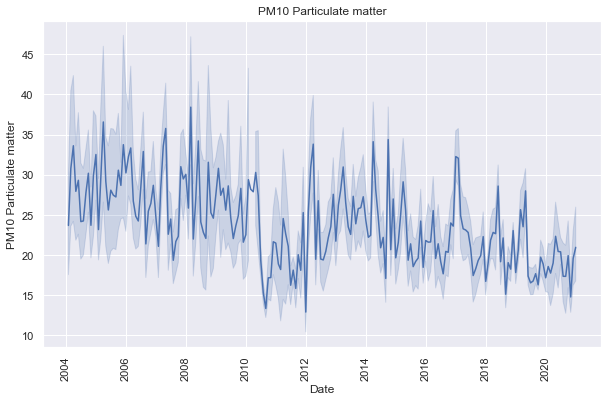

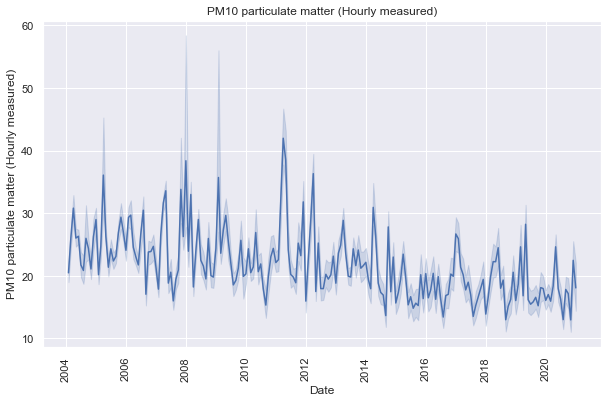

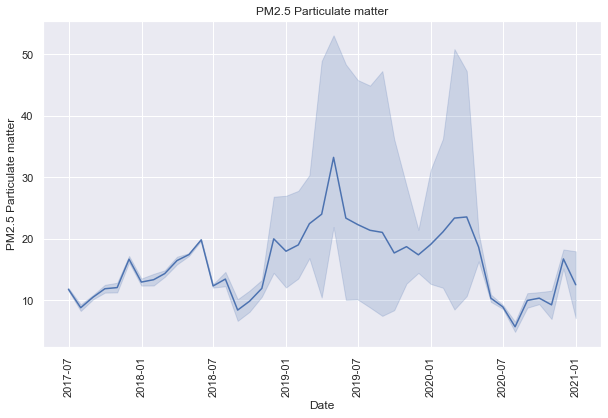

/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1371: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


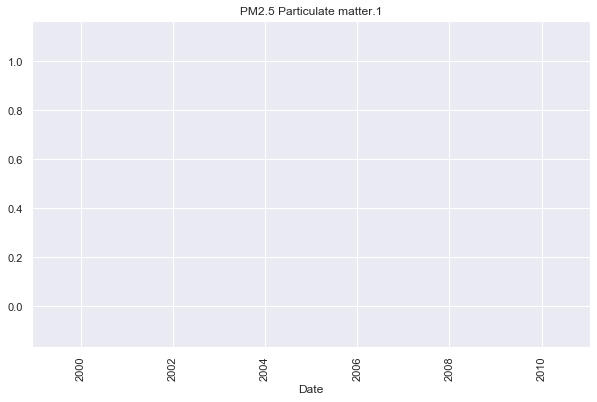

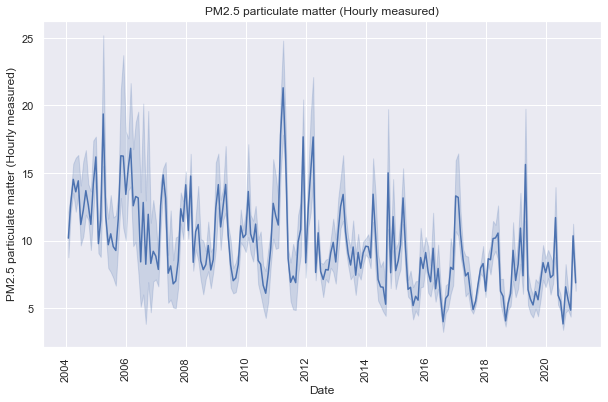

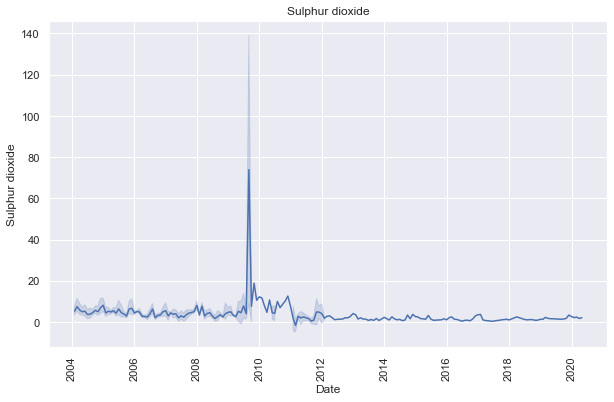

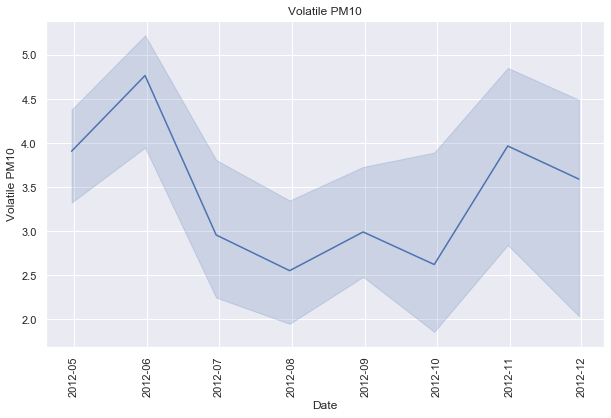

In [685]:
for p in pollutants:
    plt.figure(figsize=(10, 6))
    sns.lineplot(y= p ,
                 x='Date',
                 data=df_monthly).set_title(p)
    plt.xticks(rotation=90)
    plt.show()

### Yearly pollution levels from 2004 - 2020

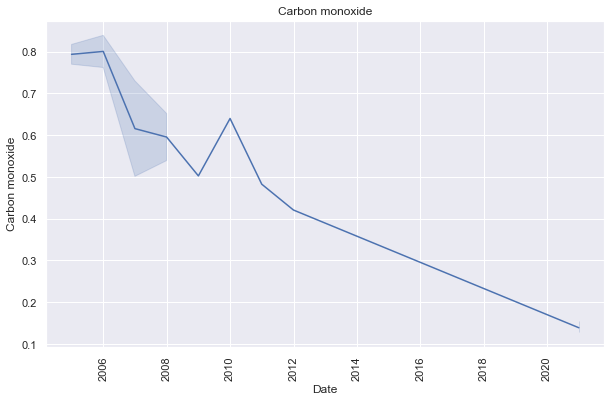

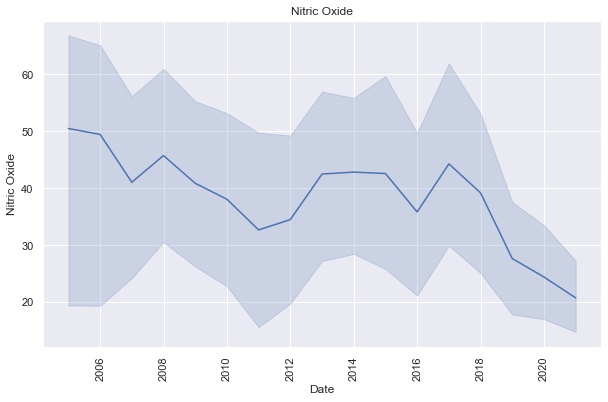

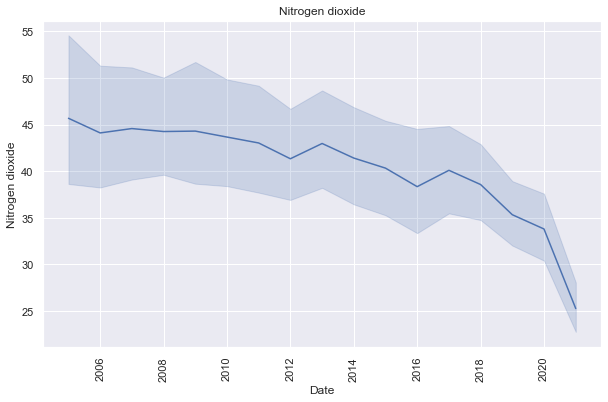

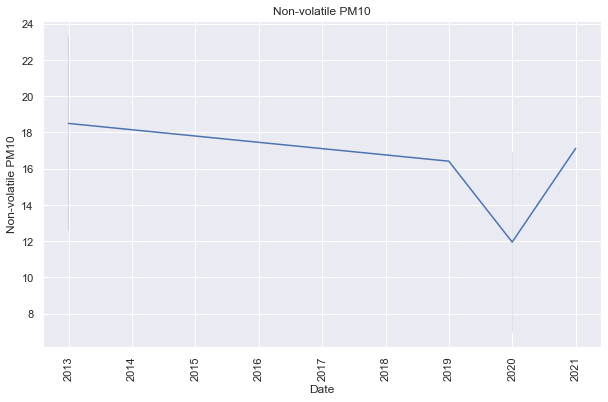

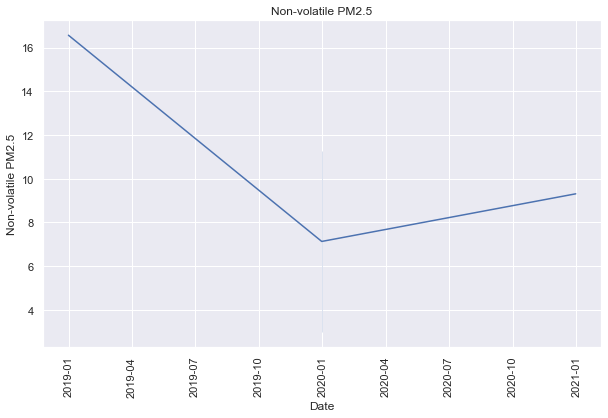

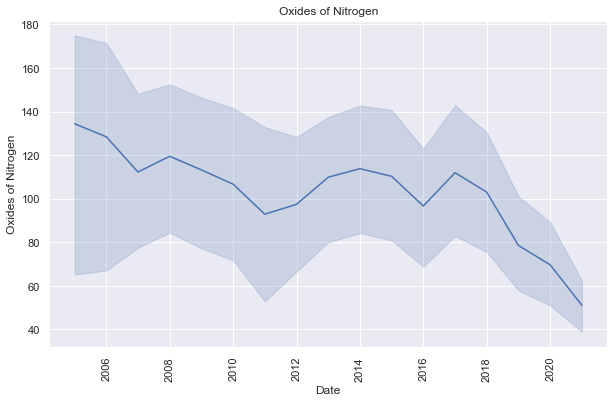

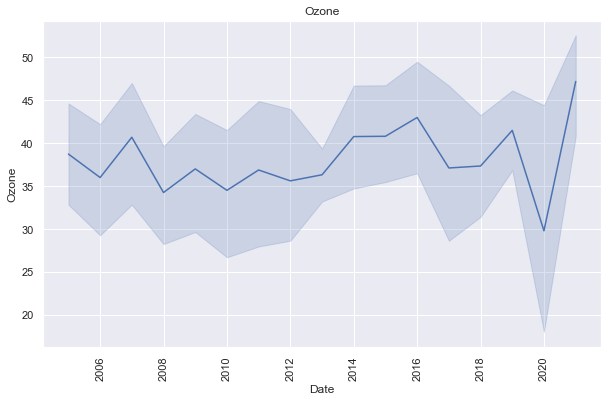

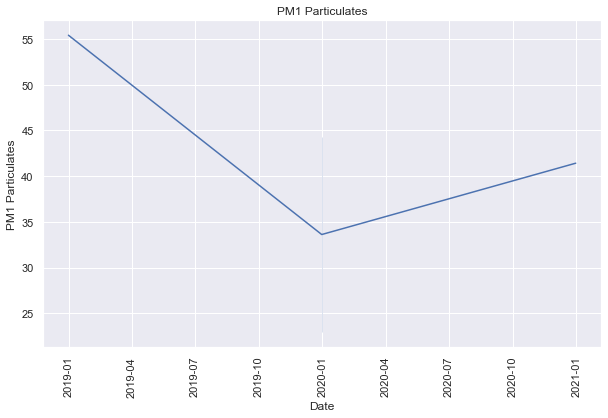

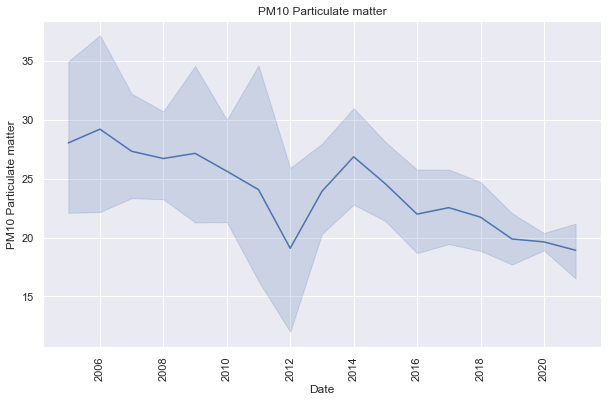

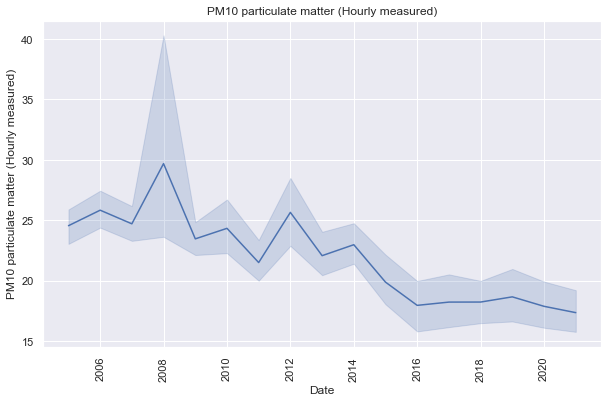

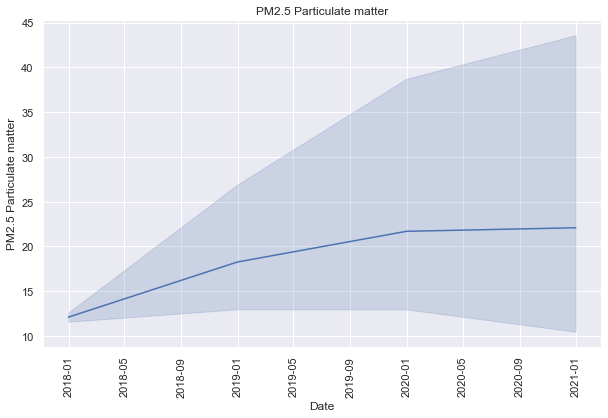

/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1371: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


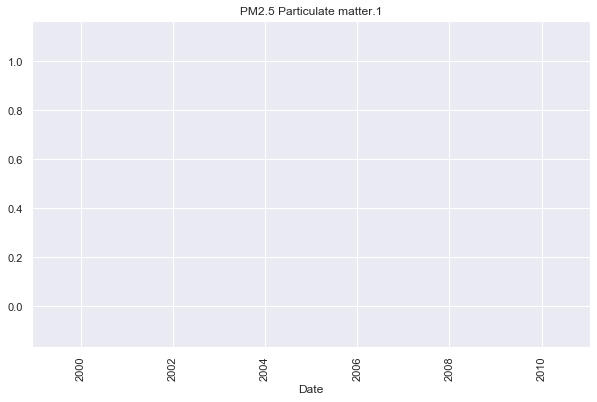

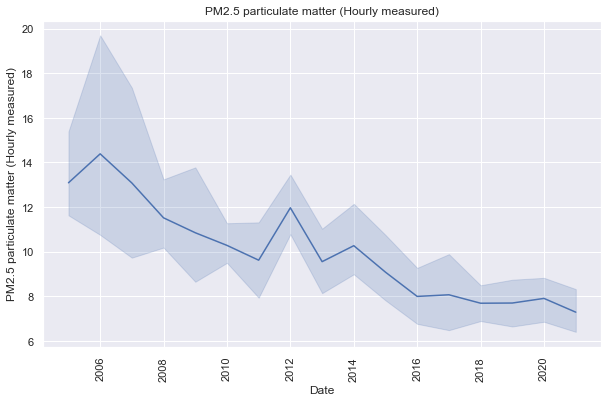

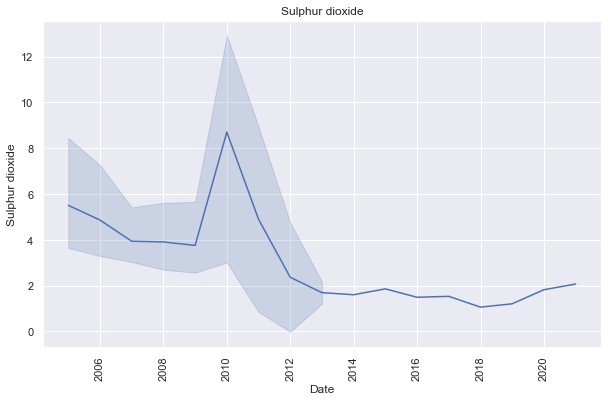

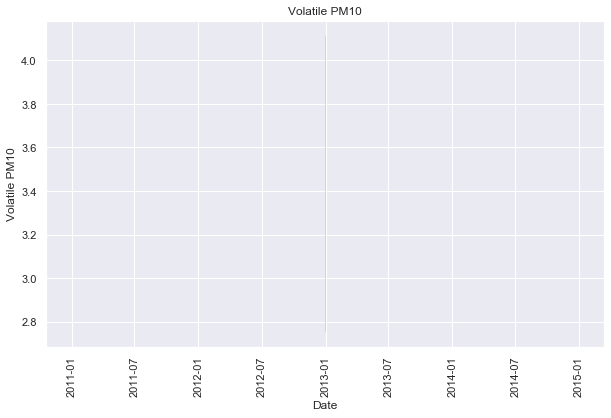

In [686]:
for p in pollutants:
    plt.figure(figsize=(10, 6))
    sns.lineplot(y= p ,
                 x='Date',
                 data=df_yearly).set_title(p)
    plt.xticks(rotation=90)
    plt.show()

### Dropping Pullutants with limited data

In [792]:
df_monthly = df_monthly.drop(['Non-volatile PM10', 
                            'Non-volatile PM2.5', 
                            'PM1 Particulates', 
                            'PM2.5 Particulate matter',
                            'PM2.5 Particulate matter.1',
                            'Volatile PM10'], axis = 1)
df_quaterly = df_quaterly.drop(['Non-volatile PM10', 
                            'Non-volatile PM2.5', 
                            'PM1 Particulates', 
                            'PM2.5 Particulate matter',
                            'PM2.5 Particulate matter.1',
                            'Volatile PM10'], axis = 1)

In [793]:
df_yearly = df_yearly.drop(['Non-volatile PM10', 
                            'Non-volatile PM2.5', 
                            'PM1 Particulates', 
                            'PM2.5 Particulate matter',
                            'PM2.5 Particulate matter.1',
                            'Volatile PM10'], axis = 1)
df_yearly.head()

Location       Date  Carbon monoxide  Nitric Oxide  \
0   Hounslow 2 - Cranford 2004-12-31              NaN     19.366907   
1   Hounslow 2 - Cranford 2005-12-31              NaN     19.282252   
2   Hounslow 2 - Cranford 2006-12-31              NaN     16.322724   
3   Hounslow 2 - Cranford 2007-12-31              NaN     22.751626   
4   Hounslow 2 - Cranford 2008-12-31              NaN     19.463412   

   Nitrogen dioxide  Oxides of Nitrogen      Ozone  PM10 Particulate matter  \
0         35.637110           65.183649  31.628426                22.091612   
1         37.730687           66.993132  34.426010                22.159977   
2         37.439653           62.493307  41.626836                22.695308   
3         34.516199           69.260681  31.764437                21.877800   
4         36.025263           65.728967  36.527434                19.221030   

   PM10 particulate matter (Hourly measured)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   PM2.5 particulate matter (Hourly measured)  Sulphur dioxide  
0                                         NaN         3.611565  
1                                         NaN         3.959997  
2                                         NaN         3.018580  
3                                         NaN         2.886371  
4                                         NaN         3.046298

In [794]:
# df_yearly.to_csv("inner_yearly_agg.csv") 

### Melting Pollutants into a single column

In [215]:
# boroughs = ['Heathrow', 'Ealing', 'Heathrow', 'Hillingdon', 'Richmond', 'Slough', 'Teddington']

In [795]:
poll_vars = df_monthly[['Location', 'Date']]
melted_daily = pd.melt(df_daily, id_vars=list(poll_vars.columns), value_vars = list(df_daily.drop(['Location', 'Date'], axis = 1)), var_name = 'Pollutant', value_name = 'Indicator Value (R µg/m3)')
melted_monthly = pd.melt(df_monthly, id_vars=list(poll_vars.columns), value_vars = list(df_monthly.drop(['Location', 'Date'], axis = 1)), var_name = 'Pollutant', value_name = 'Indicator Value (R µg/m3)')
melted_quaterly = pd.melt(df_quaterly, id_vars=list(poll_vars.columns), value_vars = list(df_quaterly.drop(['Location', 'Date'], axis = 1)), var_name = 'Pollutant', value_name = 'Indicator Value (R µg/m3)')
melted_yearly = pd.melt(df_yearly, id_vars=list(poll_vars.columns), value_vars = list(df_yearly.drop(['Location', 'Date'], axis = 1)), var_name = 'Pollutant', value_name = 'Indicator Value (R µg/m3)')
melted_yearly.head()

Location       Date        Pollutant  \
0   Hounslow 2 - Cranford 2004-12-31  Carbon monoxide   
1   Hounslow 2 - Cranford 2005-12-31  Carbon monoxide   
2   Hounslow 2 - Cranford 2006-12-31  Carbon monoxide   
3   Hounslow 2 - Cranford 2007-12-31  Carbon monoxide   
4   Hounslow 2 - Cranford 2008-12-31  Carbon monoxide   

   Indicator Value (R µg/m3)  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN

In [796]:
melted_yearly.Location.unique()

array([' Hounslow 2 - Cranford', ' Hounslow 4 - Chiswick High Road',
       ' Hounslow Brentford', ' Hounslow Feltham',
       ' Hounslow Gunnersbury', ' Hounslow Hatton Cross',
       ' Hounslow Heston Road', 'Ealing - Acton Town Hall',
       'Ealing - Acton Town Hall (Partisol)',
       'Ealing - Acton Town Hall FDMS', 'Ealing - Acton Vale ',
       'Ealing - Court Way', 'Ealing - Ealing Town Hall',
       'Ealing - Greenford', 'Ealing - Hanger Lane Gyratory',
       'Ealing - Southall', 'Ealing - Southall FDMS',
       'Ealing - Southall Railway', 'Ealing - Western Avenue',
       'Elmbridge - Bell Farm Hersham', 'Elmbridge - Esher High Street',
       'Elmbridge - Walton High Street', 'Elmbridge Hampton Court Parade',
       'Elmbridge Weybridge High St', 'Elmbridge Weybridge High St 2',
       'Farnham The Woolmead', 'Godalming Ockford Road 2',
       'Heathrow Bath Road', 'Heathrow Green Gates', 'Heathrow LHR2',
       'Heathrow Oaks Road', 'Hillingdon 2 - Hillingdon Hospital',


In [797]:
melted_yearly['Location']

0           Hounslow 2 - Cranford
1           Hounslow 2 - Cranford
2           Hounslow 2 - Cranford
3           Hounslow 2 - Cranford
4           Hounslow 2 - Cranford
                  ...            
6088    Slough Windmill Bath Road
6089     Spelthorne Sunbury Cross
6090     Spelthorne Sunbury Cross
6091     Spelthorne Sunbury Cross
6092     Spelthorne Sunbury Cross
Name: Location, Length: 6093, dtype: object

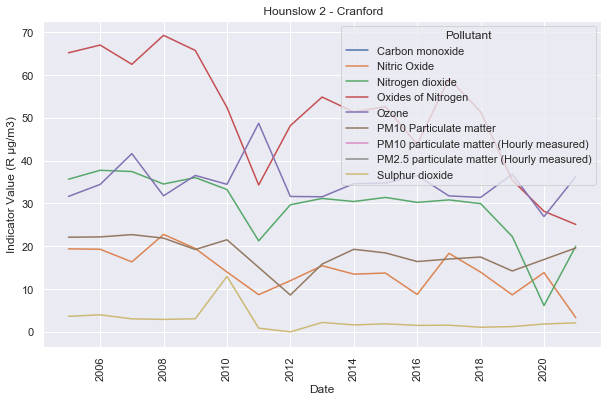

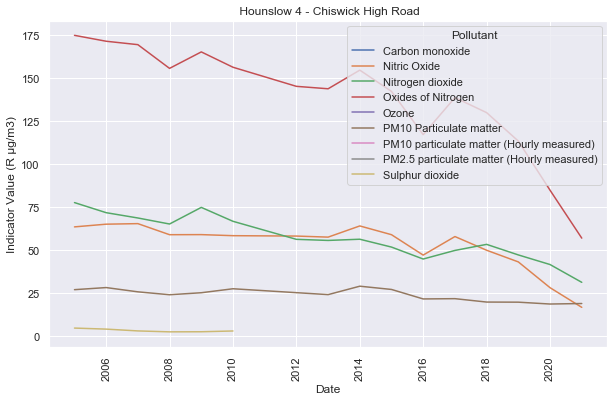

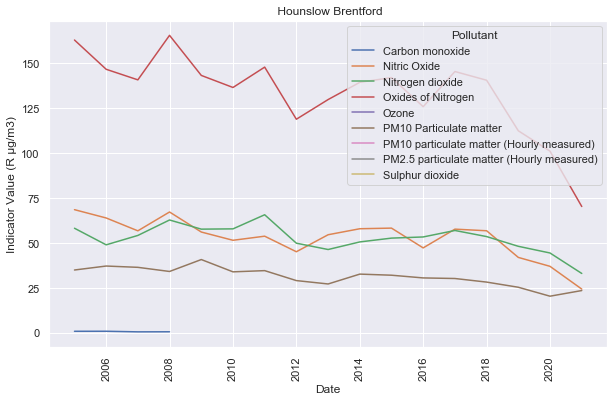

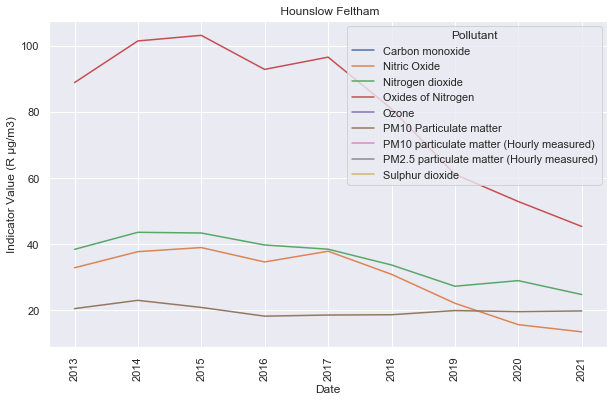

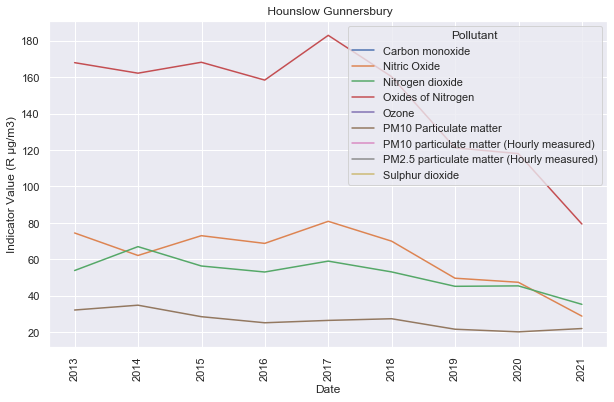

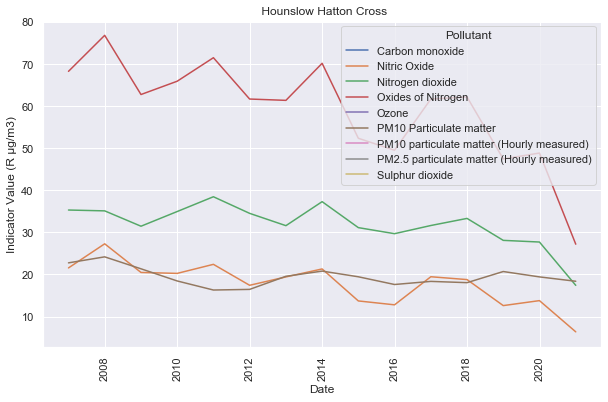

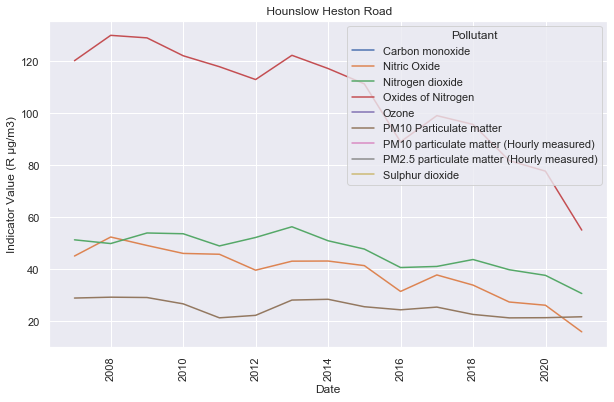

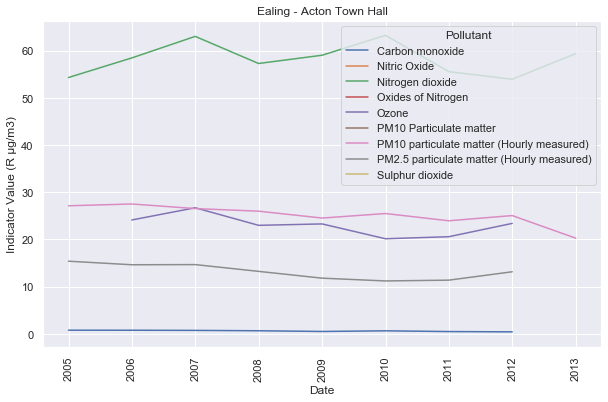

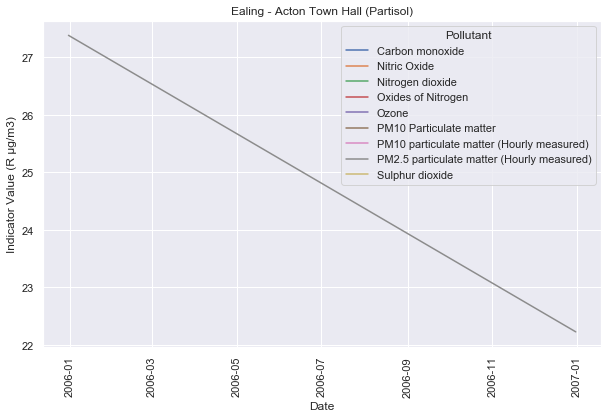

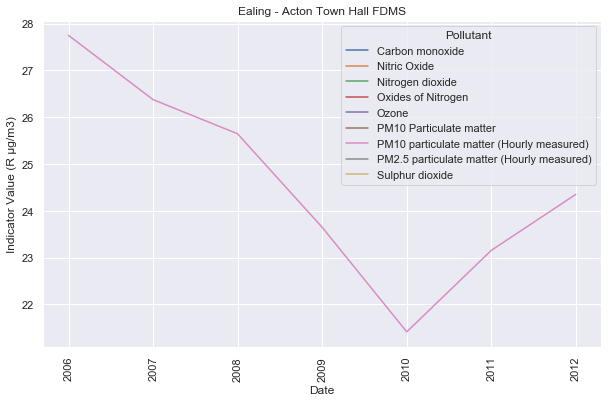

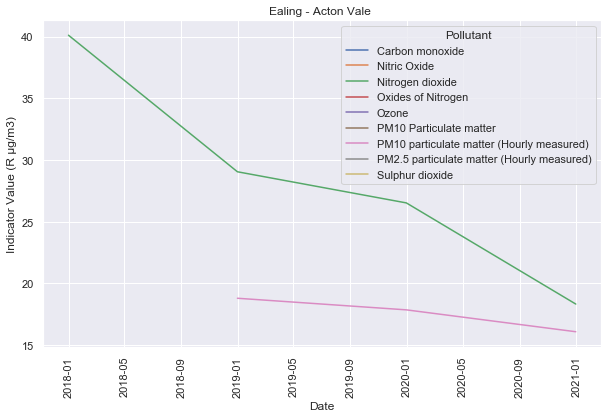

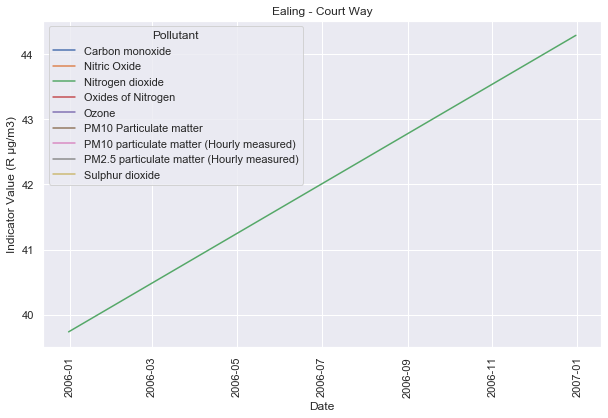

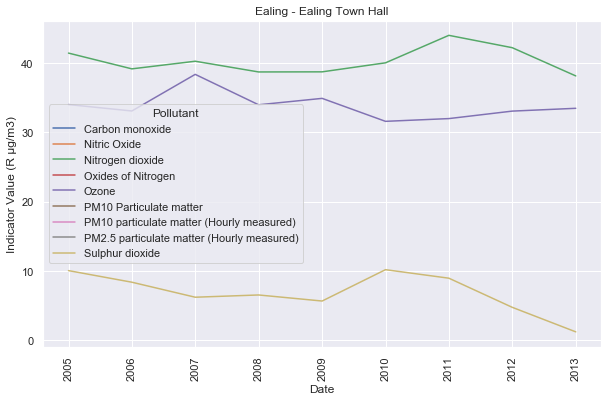

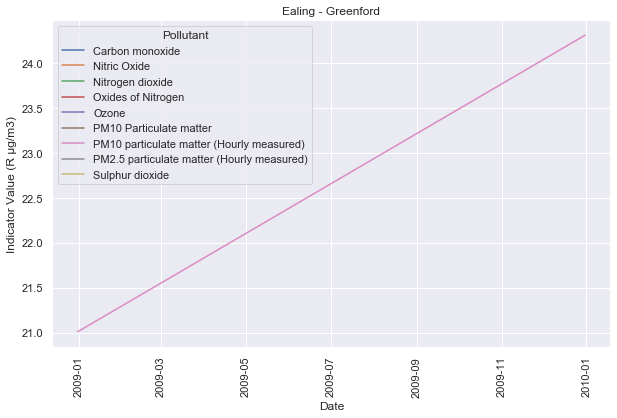

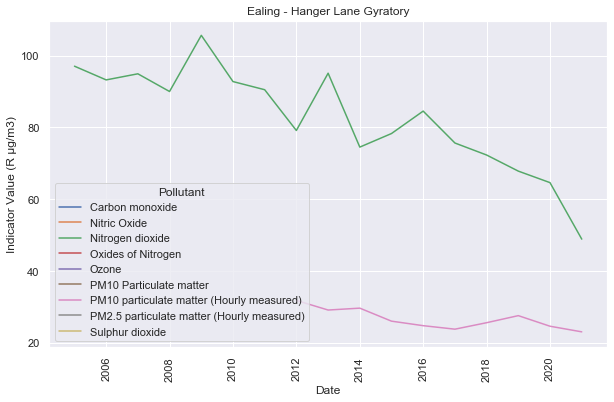

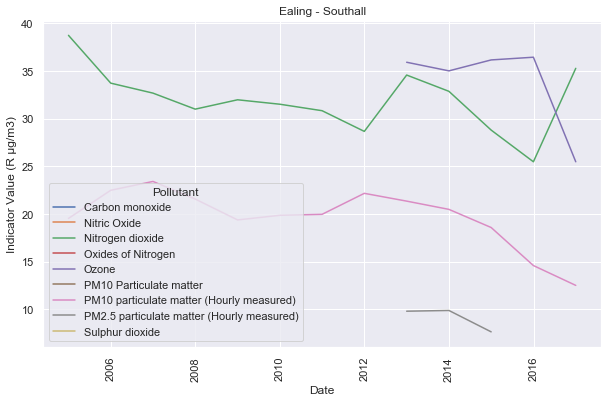

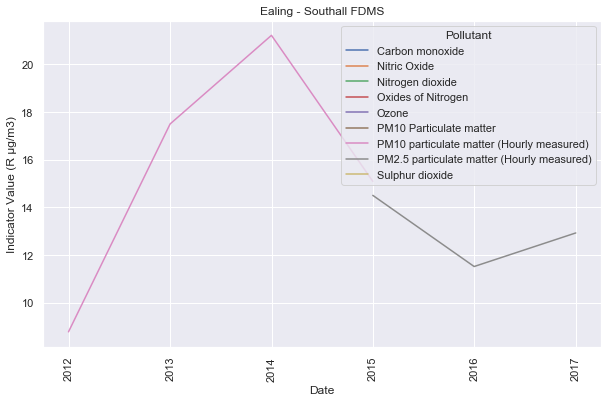

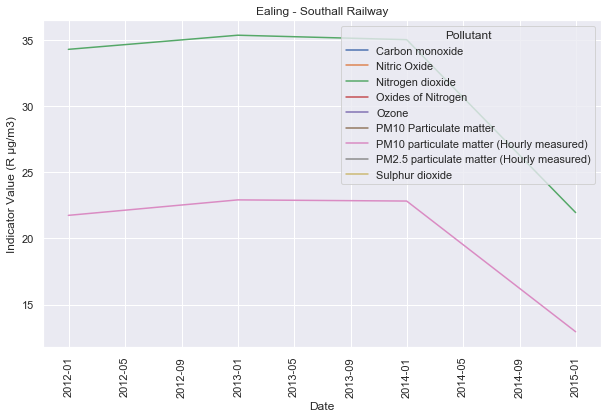

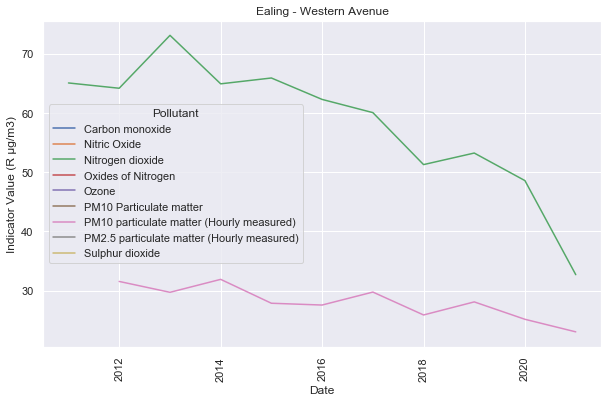

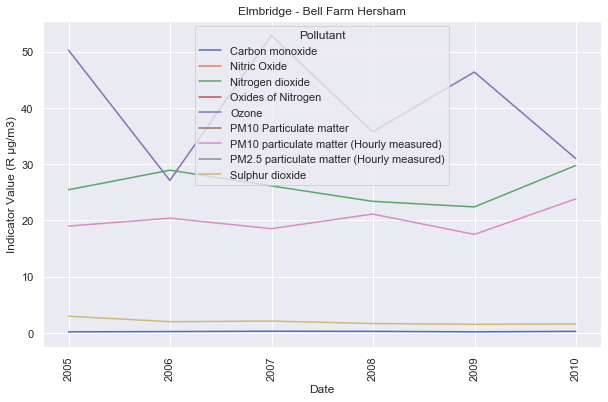

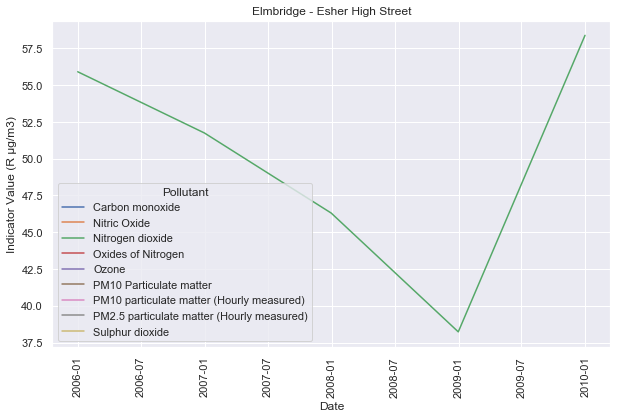

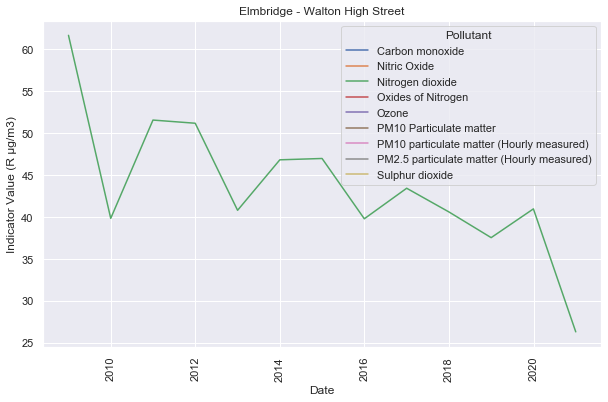

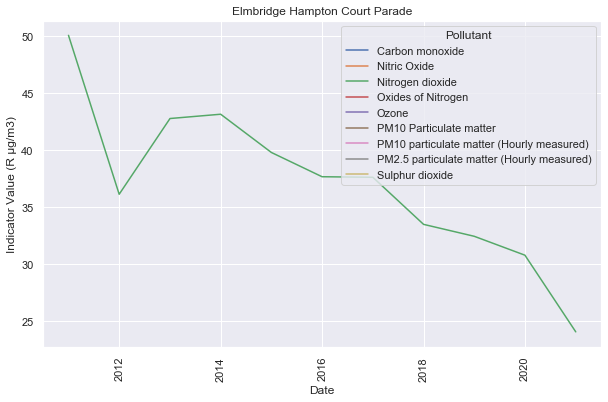

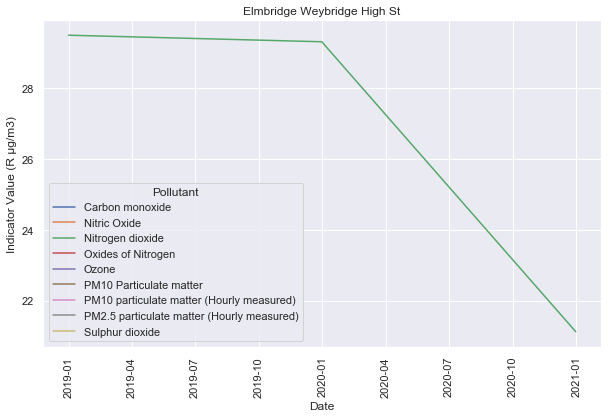

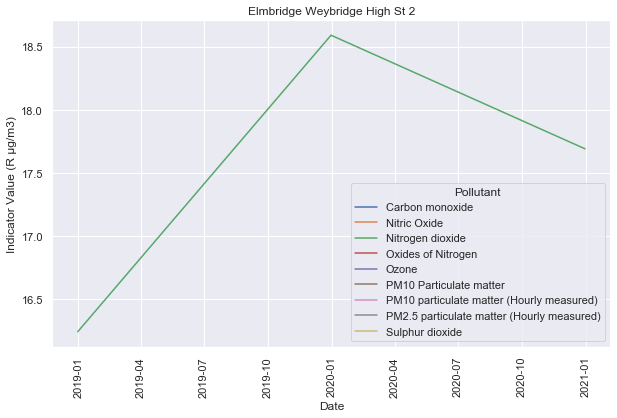

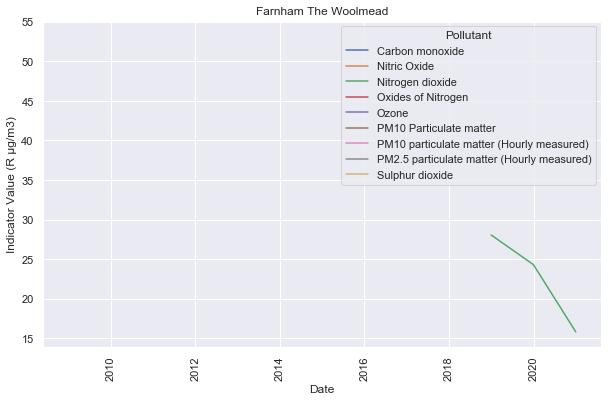

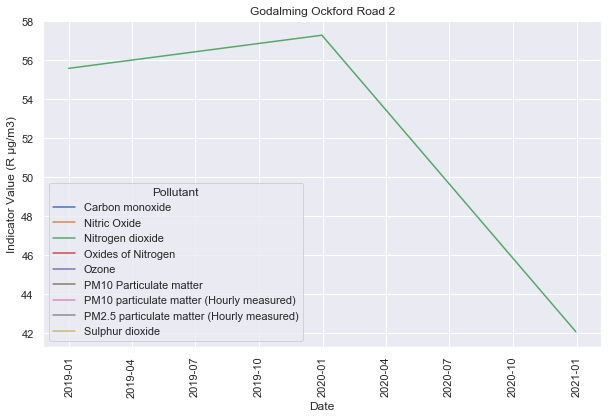

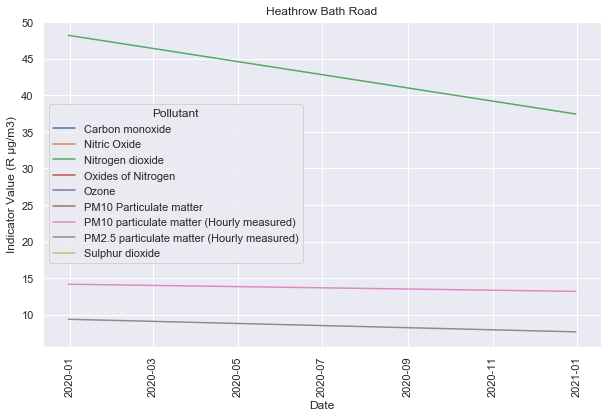

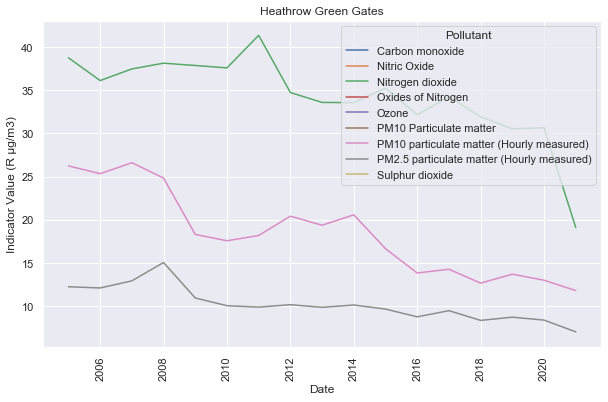

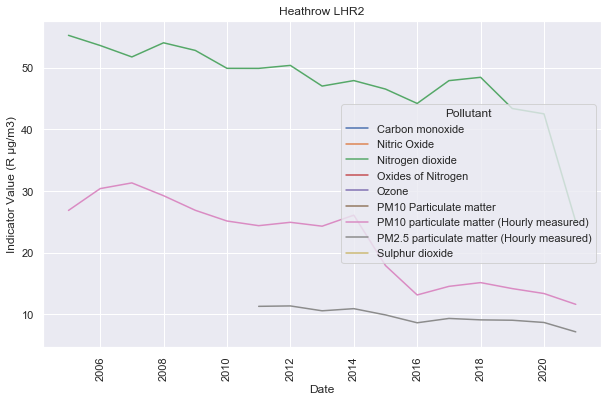

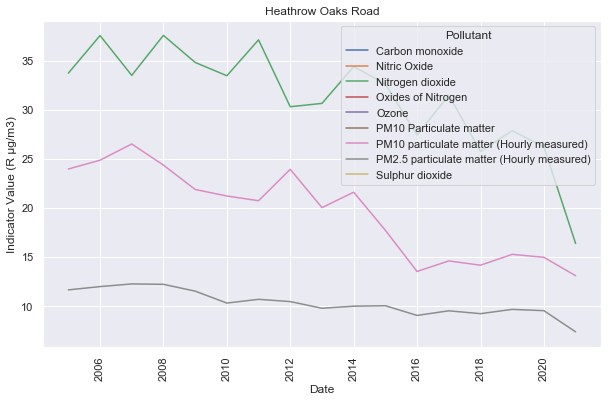

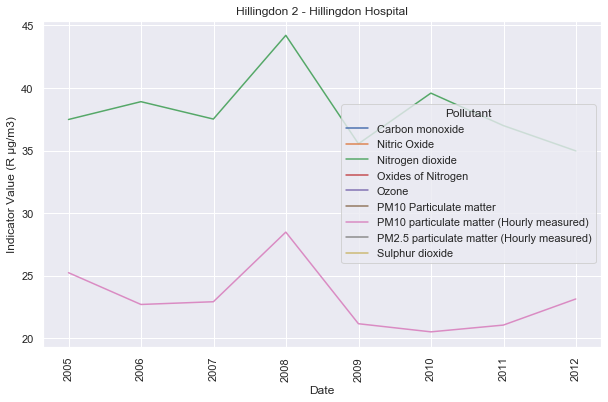

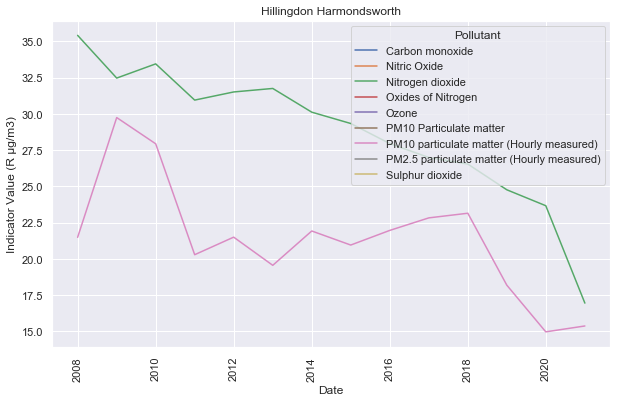

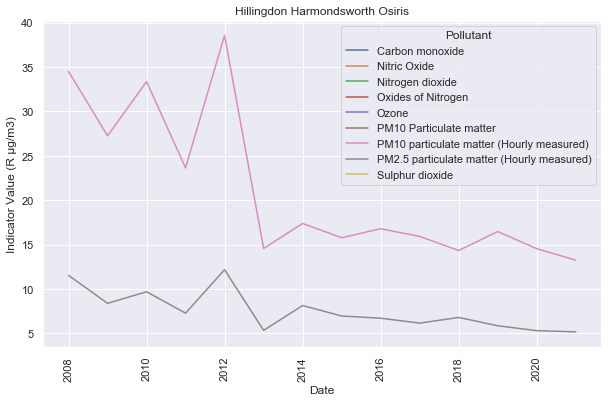

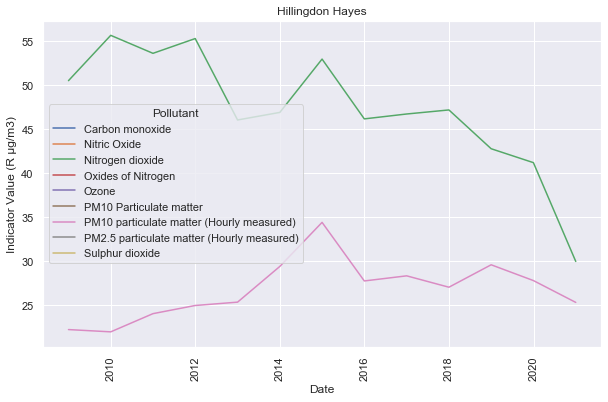

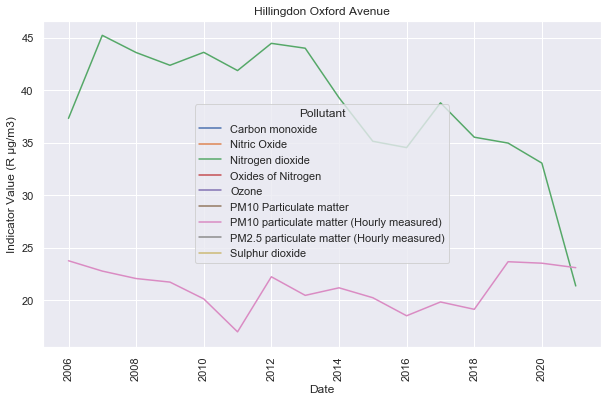

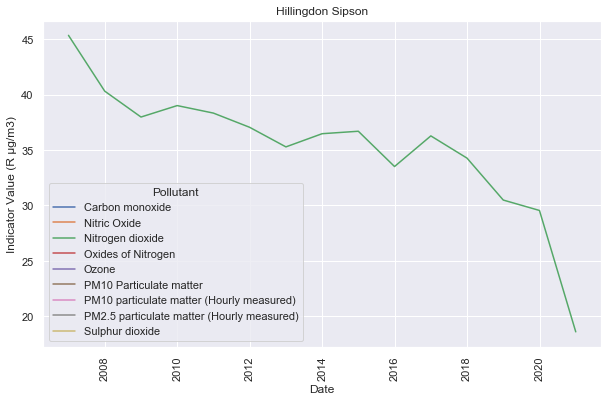

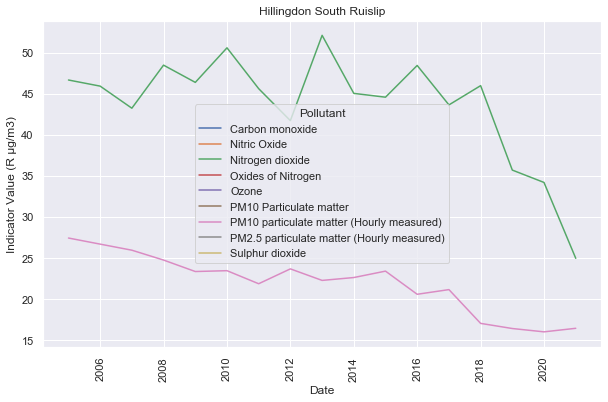

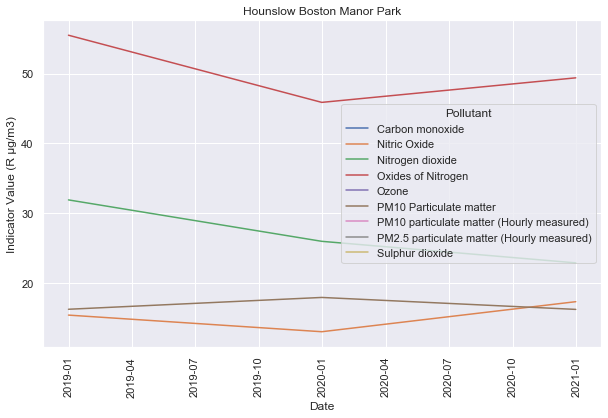

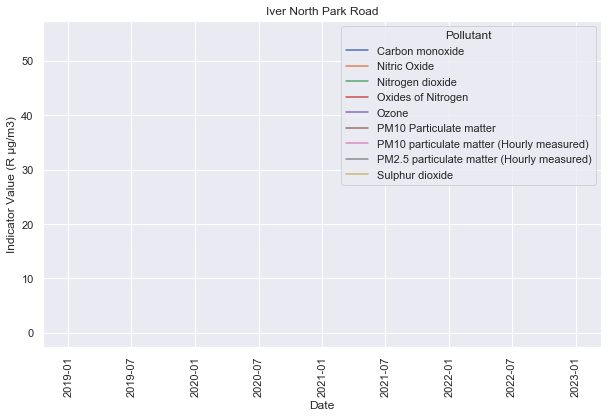

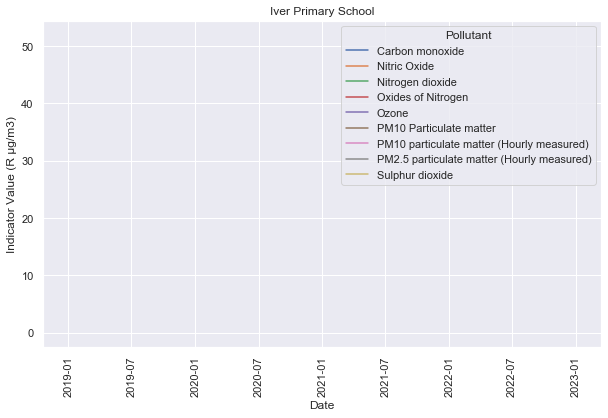

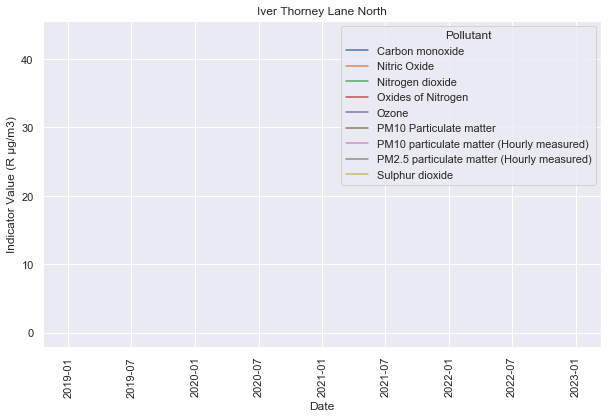

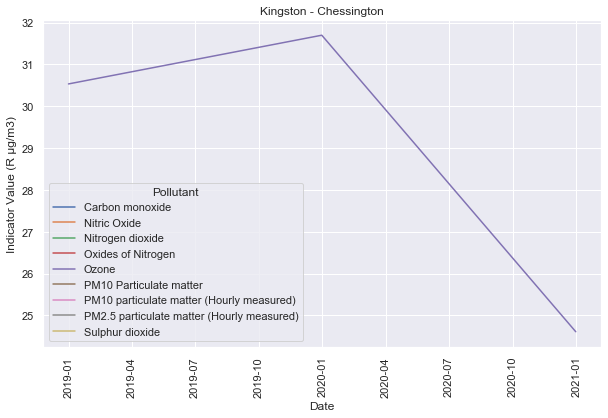

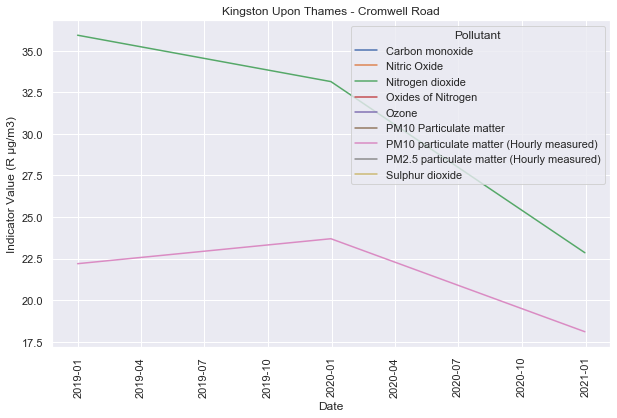

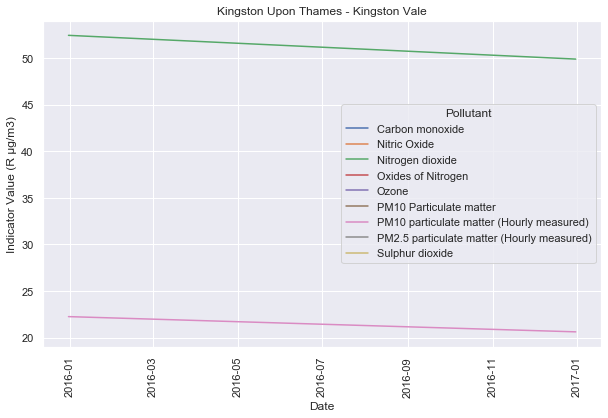

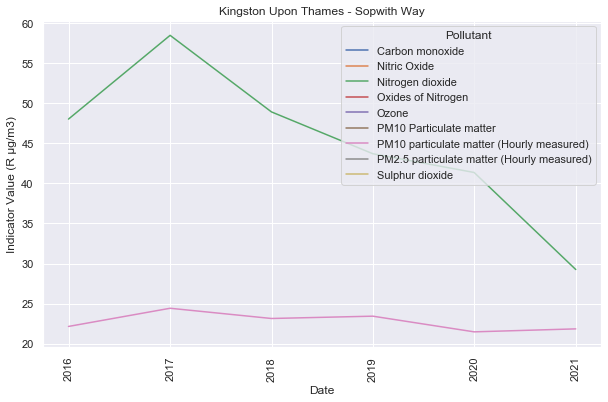

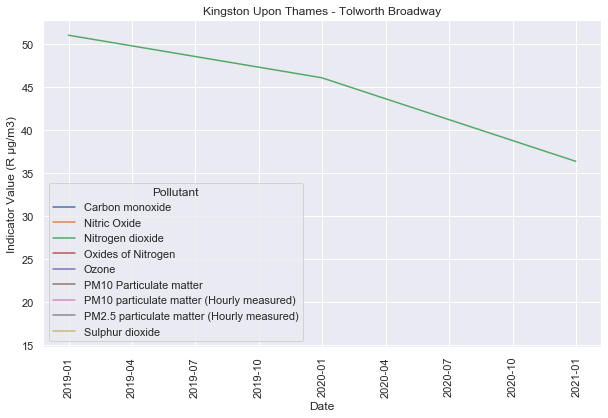

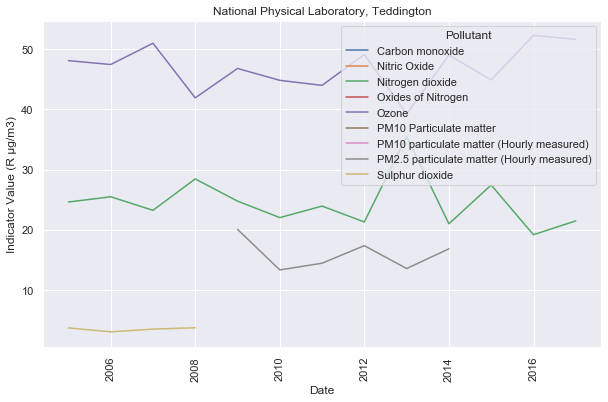

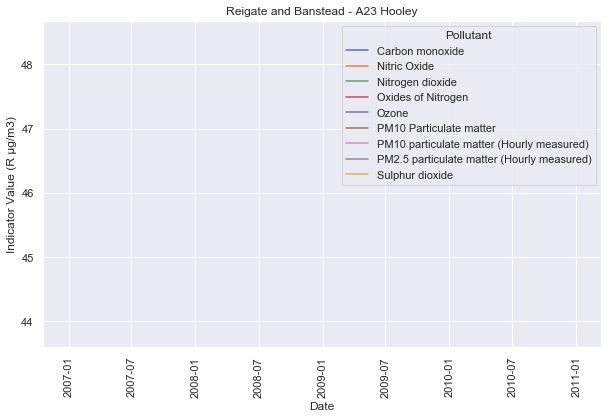

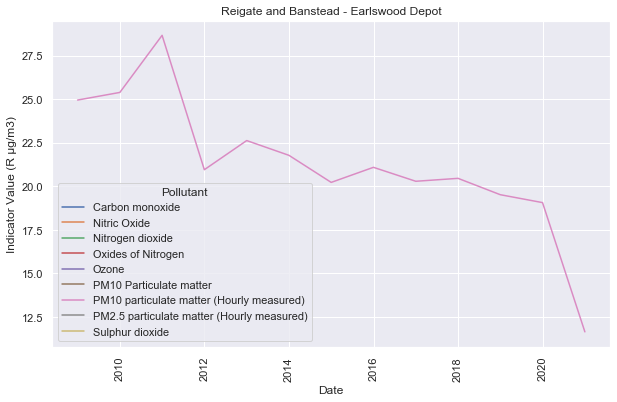

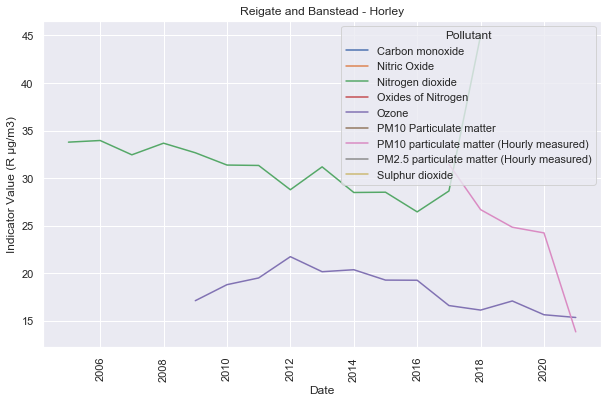

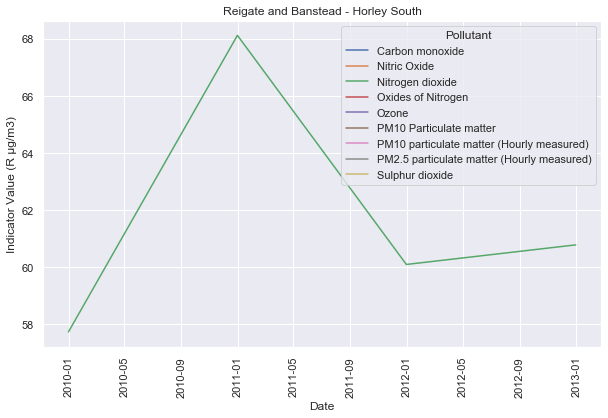

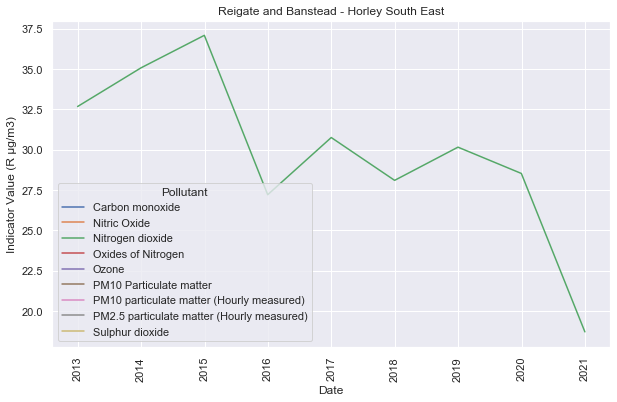

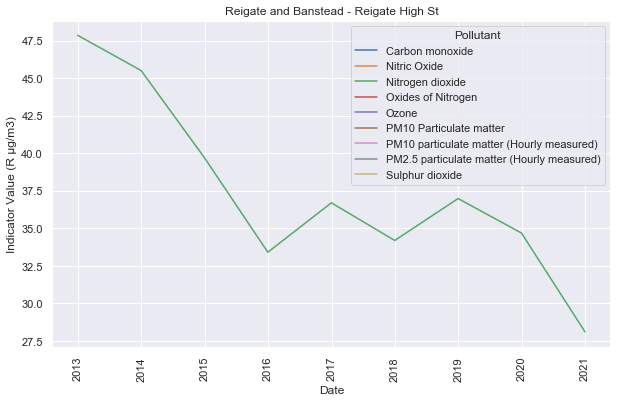

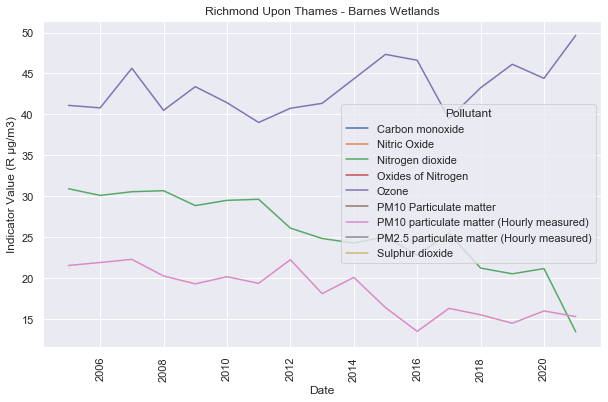

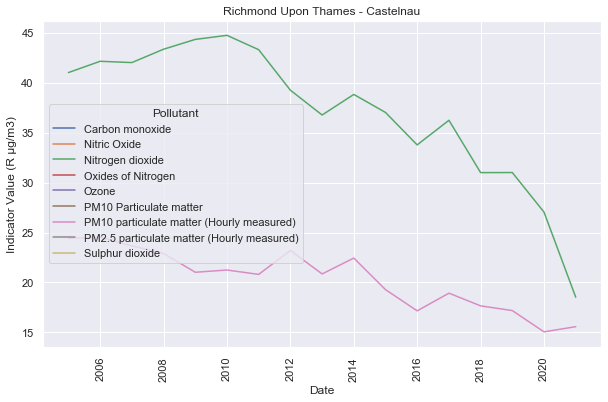

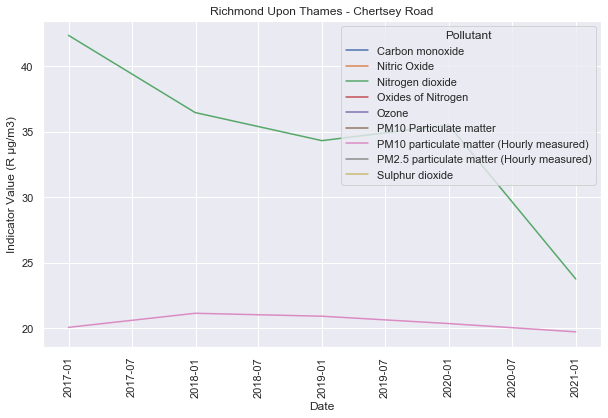

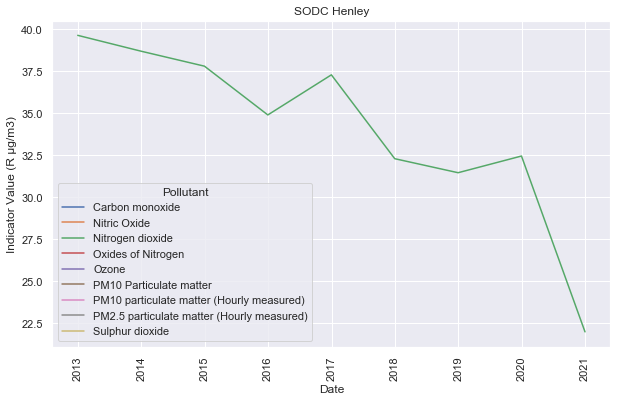

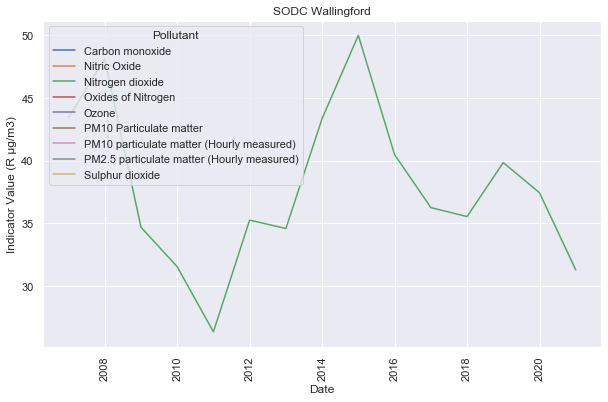

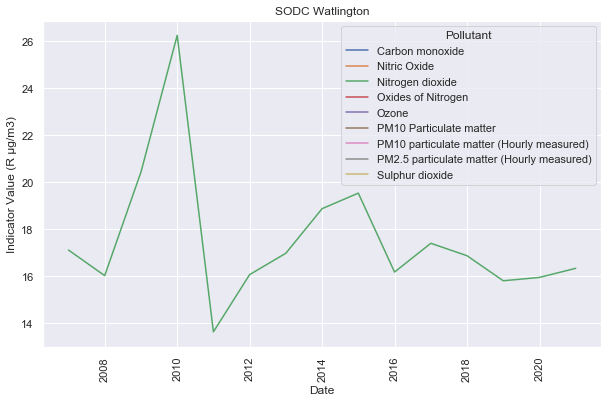

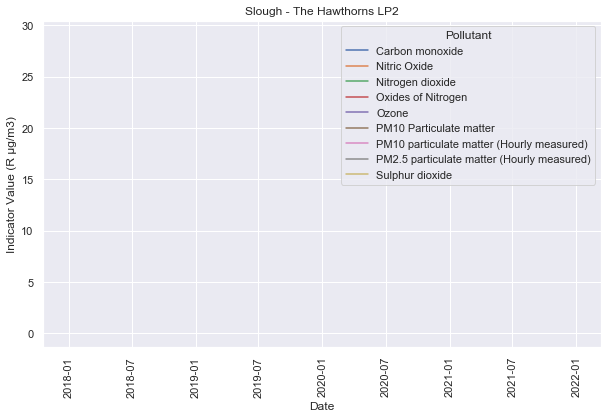

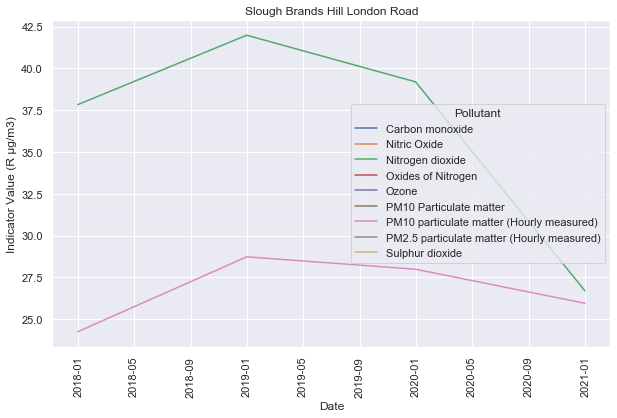

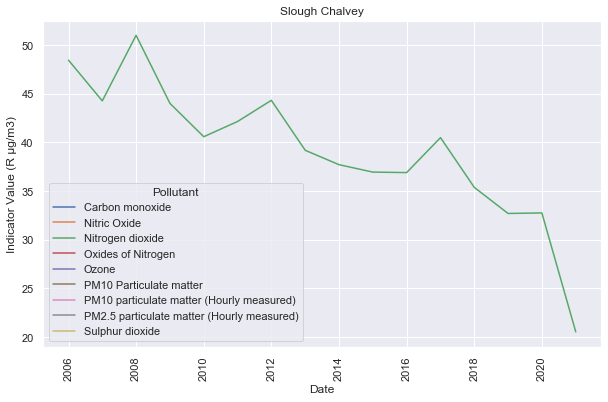

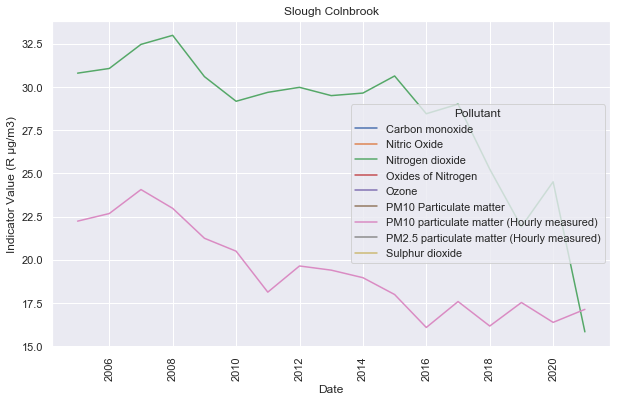

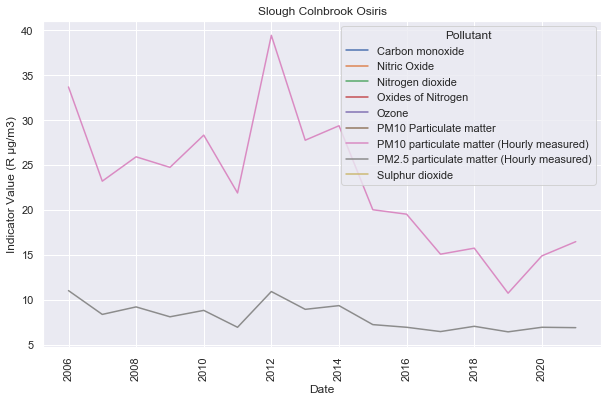

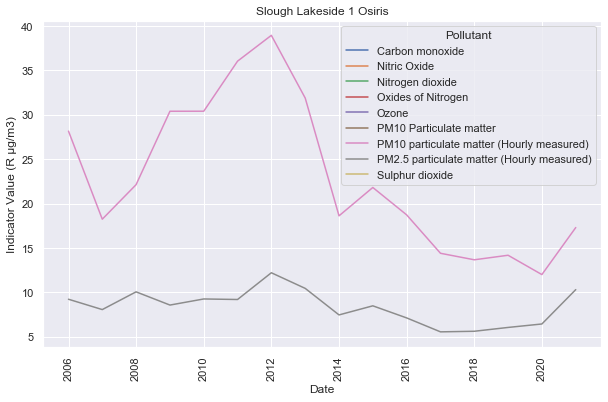

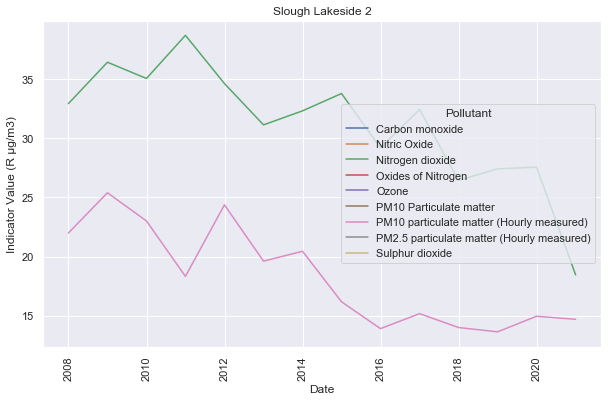

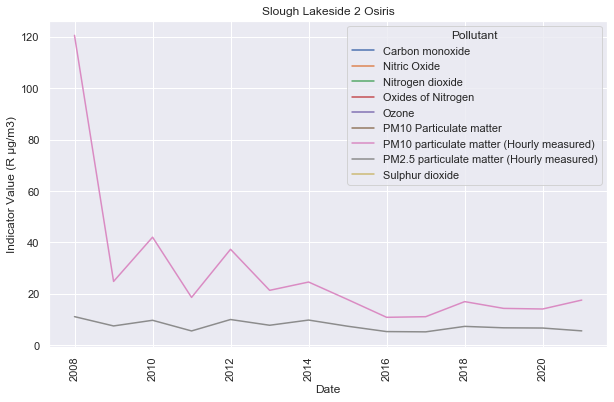

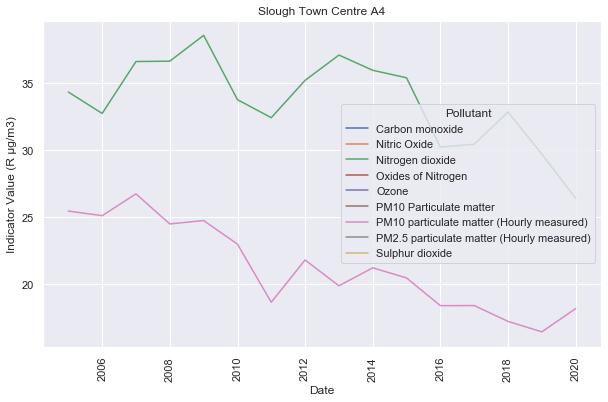

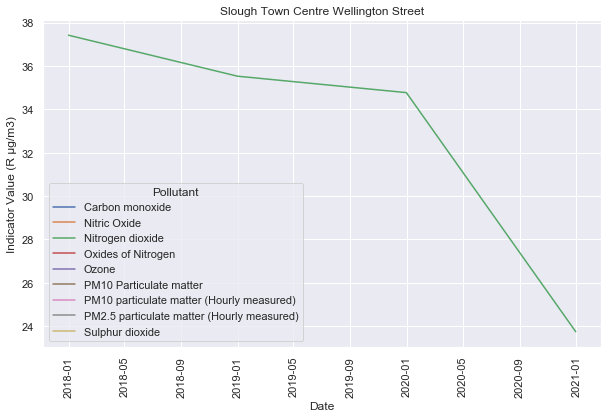

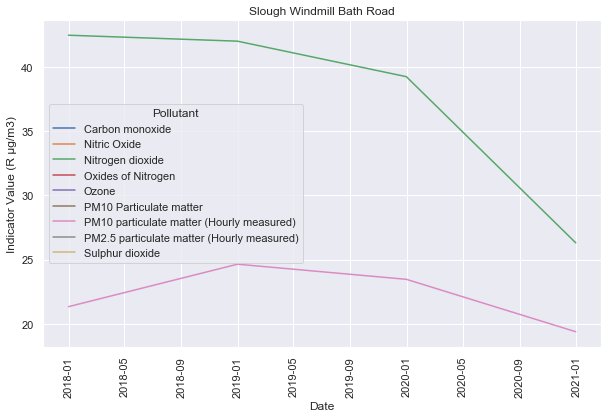

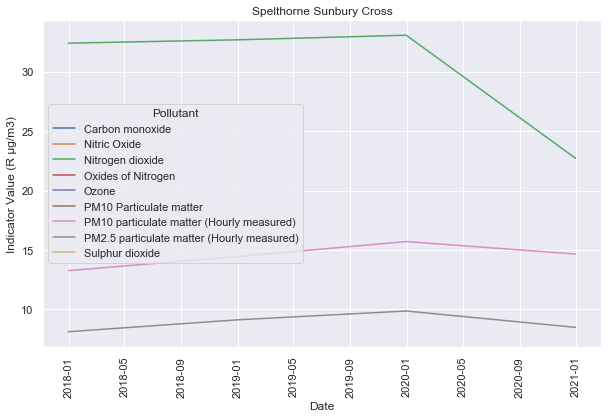

In [798]:
for l in melted_yearly['Location'].unique():
    plt.figure(figsize=(10, 6))
    sns.lineplot(y = 'Indicator Value (R µg/m3)' ,
                 x ='Date',
                 hue = 'Pollutant',
                 data = melted_yearly[melted_yearly['Location'] == l]).set_title(l)
    plt.xticks(rotation=90)
    plt.show()

### Mapping CCGs

In [799]:
len(list(melted_yearly.Location.unique()))

72

In [800]:
list(extra.Location.unique())

['Elmbridge - Bell Farm Hersham',
 'Reigate and Banstead - Horley',
 'Elmbridge - Esher High Street',
 'SODC Wallingford',
 'SODC Watlington',
 'Farnham The Woolmead',
 'Elmbridge - Walton High Street',
 'Reigate and Banstead - Earlswood Depot',
 'Reigate and Banstead - Horley South',
 'Elmbridge Hampton Court Parade',
 'Reigate and Banstead - Reigate High St',
 'Reigate and Banstead - Horley South East',
 'SODC Henley',
 'Kingston Upon Thames - Kingston Vale',
 'Kingston Upon Thames - Sopwith Way',
 'Elmbridge Weybridge High St',
 'Elmbridge Weybridge High St 2',
 'Godalming Ockford Road 2',
 'Kingston - Chessington',
 'Kingston Upon Thames - Cromwell Road',
 'Kingston Upon Thames - Tolworth Broadway',
 'Reigate and Banstead - A23 Hooley',
 'Slough - The Hawthorns LP2']

In [860]:
CCG = {'Hillingdon':['Hillingdon 2 - Hillingdon Hospital',
                     'Hillingdon Harmondsworth',
                     'Hillingdon Harmondsworth Osiris',
                     'Hillingdon Hayes',
                     'Hillingdon Oxford Avenue',
                     'Hillingdon Sipson',
                     'Hillingdon South Ruislip', 
                     'Heathrow LHR2', 
                     'Heathrow Bath Road', 
                     'Heathrow Green Gates'],
       'East Berkshire':['Slough Brands Hill London Road',
                         'Slough Chalvey', 
                         'Slough Colnbrook',
                         'Slough Colnbrook Osiris',
                         'Slough Lakeside 1 Osiris',
                         'Slough Lakeside 2',
                         'Slough Lakeside 2 Osiris',
                         'Slough Town Centre A4',
                         'Slough Town Centre Wellington Street',
                         'Slough Windmill Bath Road',
                         'Slough - The Hawthorns LP2'],
       'Hounslow': [' Hounslow 2 - Cranford',
                    ' Hounslow 4 - Chiswick High Road',
                    ' Hounslow Brentford',
                    ' Hounslow Feltham',
                    ' Hounslow Gunnersbury',
                    ' Hounslow Hatton Cross',
                    ' Hounslow Heston Road',
                    'Hounslow Boston Manor Park'],
       'Ealing':['Ealing - Acton Town Hall',
                 'Ealing - Acton Town Hall (Partisol)',
                 'Ealing - Acton Town Hall FDMS',
                 'Ealing - Acton Vale ',
                 'Ealing - Court Way',
                 'Ealing - Ealing Town Hall',
                 'Ealing - Greenford',
                 'Ealing - Hanger Lane Gyratory',
                 'Ealing - Southall',
                 'Ealing - Southall FDMS',
                 'Ealing - Southall Railway',
                 'Ealing - Western Avenue'],
       'Surrey Heartlands': ['Spelthorne Sunbury Cross','Heathrow Oaks Road',
                             'Elmbridge - Bell Farm Hersham', 'Elmbridge - Esher High Street',
                             'Elmbridge - Walton High Street', 
                             'Elmbridge Hampton Court Parade',
                             'Elmbridge Weybridge High St', 
                             'Elmbridge Weybridge High St 2',
                             'Reigate and Banstead - Horley',
                             'Reigate and Banstead - Earlswood Depot',
                             'Reigate and Banstead - Horley South',
                             'Reigate and Banstead - Reigate High St',
                             'Reigate and Banstead - Horley South East',
                             'Reigate and Banstead - A23 Hooley', 'Farnham The Woolmead', 'Godalming Ockford Road 2'],
       'South West London': ['Richmond Upon Thames - Barnes Wetlands',
                             'Richmond Upon Thames - Castelnau',
                             'Richmond Upon Thames - Chertsey Road',
                             'National Physical Laboratory, Teddington',
                            'Kingston Upon Thames - Kingston Vale',
                             'Kingston Upon Thames - Sopwith Way',
                            'Kingston - Chessington', 
                             'Kingston Upon Thames - Cromwell Road',
                             'Kingston Upon Thames - Tolworth Broadway'],
       'Buckinghamshire': ['Iver North Park Road',
       'Iver Primary School', 'Iver Thorney Lane North'],
       'Oxford':['SODC Wallingford', 'SODC Watlington', 'SODC Henley']} 

In [861]:
sum([len(x) for x in CCG.values()])

72

In [862]:
def get_ccg(loc):
    for key, value in CCG.items():
        for v in value:
                if v == loc:
                    return key

In [863]:
df_yearly['CCG'] = df_yearly.apply(lambda row: get_ccg(row['Location']), axis = 1)

In [864]:
df_yearly.head()

Location       Date  Carbon monoxide  Nitric Oxide  \
0   Hounslow 2 - Cranford 2004-12-31              NaN     19.366907   
1   Hounslow 2 - Cranford 2005-12-31              NaN     19.282252   
2   Hounslow 2 - Cranford 2006-12-31              NaN     16.322724   
3   Hounslow 2 - Cranford 2007-12-31              NaN     22.751626   
4   Hounslow 2 - Cranford 2008-12-31              NaN     19.463412   

   Nitrogen dioxide  Oxides of Nitrogen      Ozone  PM10 Particulate matter  \
0         35.637110           65.183649  31.628426                22.091612   
1         37.730687           66.993132  34.426010                22.159977   
2         37.439653           62.493307  41.626836                22.695308   
3         34.516199           69.260681  31.764437                21.877800   
4         36.025263           65.728967  36.527434                19.221030   

   PM10 particulate matter (Hourly measured)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   PM2.5 particulate matter (Hourly measured)  Sulphur dioxide       CCG  
0                                         NaN         3.611565  Hounslow  
1                                         NaN         3.959997  Hounslow  
2                                         NaN         3.018580  Hounslow  
3                                         NaN         2.886371  Hounslow  
4                                         NaN         3.046298  Hounslow

In [865]:
# df_yearly.to_csv("inner_yearly_agg.csv")

In [866]:
melted_yearly['CCG'] = melted_yearly.apply(lambda row: get_ccg(row['Location']), axis = 1)

In [867]:
melted_yearly.head()

Location       Date        Pollutant  \
0   Hounslow 2 - Cranford 2004-12-31  Carbon monoxide   
1   Hounslow 2 - Cranford 2005-12-31  Carbon monoxide   
2   Hounslow 2 - Cranford 2006-12-31  Carbon monoxide   
3   Hounslow 2 - Cranford 2007-12-31  Carbon monoxide   
4   Hounslow 2 - Cranford 2008-12-31  Carbon monoxide   

   Indicator Value (R µg/m3)       CCG  
0                        NaN  Hounslow  
1                        NaN  Hounslow  
2                        NaN  Hounslow  
3                        NaN  Hounslow  
4                        NaN  Hounslow

In [868]:
# melted_yearly.to_csv("melted_inner_yearly_agg.csv")

# Concating inner and outer pollution data

In [869]:
outer_poll = pd.read_csv('./yearlyOuterStacked.csv')
outer_poll

Date                    Location  Nitrogen dioxide      Ozone  \
0    2004-12-31                    Broadway         76.864912        NaN   
1    2004-12-31                 Brook Green         40.446501        NaN   
2    2004-12-31              Oxford High St         63.545897        NaN   
3    2004-12-31  Oxford St Ebbes (Cal Club)               NaN  40.376279   
4    2004-12-31            Watford Roadside         38.836547  37.226716   
..          ...                         ...               ...        ...   
113  2020-12-31              Oxford High St         28.006868        NaN   
114  2020-12-31  Oxford St Ebbes (Cal Club)               NaN  46.380779   
115  2020-12-31      Reading Caversham Road         24.945059        NaN   
116  2020-12-31         Reading Oxford Road         19.730862        NaN   
117  2020-12-31           Watford Town Hall         20.813022        NaN   

     PM10 particulate matter (Hourly measured)  \
0                                    29.886028   
1                                    22.430841   
2                                    27.789444   
3                                          NaN   
4                                          NaN   
..                                         ...   
113                                  15.914070   
114                                        NaN   
115                                  20.666082   
116                                  18.177858   
117                                  13.758945   

     PM2.5 particulate matter (Hourly measured)  Sulphur dioxide  \
0                                           NaN         9.171105   
1                                           NaN              NaN   
2                                           NaN              NaN   
3                                           NaN              NaN   
4                                           NaN              NaN   
..                                          ...              ...   
113                                         NaN              NaN   
114                                         NaN              NaN   
115                                         NaN              NaN   
116                                         NaN              NaN   
117                                    7.877282              NaN   

                        CCG        Lat      Long  
0    Hammersmith and Fulham  51.492766 -0.223601  
1    Hammersmith and Fulham  51.496496 -0.220503  
2                    Oxford  51.752527 -1.250939  
3                    Oxford  51.744856 -1.260338  
4                   Watford  51.658889 -0.403333  
..                      ...        ...       ...  
113                  Oxford  51.752527 -1.250939  
114                  Oxford  51.744856 -1.260338  
115                 Reading  51.464355 -0.977094  
116                 Reading  51.461957 -1.012459  
117                 Watford  51.659200 -0.402863  

[118 rows x 10 columns]

In [870]:
pollution = pd.concat([df_yearly, outer_poll], ignore_index=True, sort=False)
pollution['Date'] = [str(x)[:4] for x in pollution['Date']]
pollution.head()

Location  Date  Carbon monoxide  Nitric Oxide  \
0   Hounslow 2 - Cranford  2004              NaN     19.366907   
1   Hounslow 2 - Cranford  2005              NaN     19.282252   
2   Hounslow 2 - Cranford  2006              NaN     16.322724   
3   Hounslow 2 - Cranford  2007              NaN     22.751626   
4   Hounslow 2 - Cranford  2008              NaN     19.463412   

   Nitrogen dioxide  Oxides of Nitrogen      Ozone  PM10 Particulate matter  \
0         35.637110           65.183649  31.628426                22.091612   
1         37.730687           66.993132  34.426010                22.159977   
2         37.439653           62.493307  41.626836                22.695308   
3         34.516199           69.260681  31.764437                21.877800   
4         36.025263           65.728967  36.527434                19.221030   

   PM10 particulate matter (Hourly measured)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   PM2.5 particulate matter (Hourly measured)  Sulphur dioxide       CCG  Lat  \
0                                         NaN         3.611565  Hounslow  NaN   
1                                         NaN         3.959997  Hounslow  NaN   
2                                         NaN         3.018580  Hounslow  NaN   
3                                         NaN         2.886371  Hounslow  NaN   
4                                         NaN         3.046298  Hounslow  NaN   

   Long  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN

In [871]:
# inner = ['Hounslow', 'Ealing', 'Surrey Heartlands', 'Hillingdon', 'South West London', 'East Berkshire', 'Buckinghamshire']

In [872]:
# in_out = []

# for l in pollution['CCG']:
#     if l in inner:
#         in_out.append('Inner')
#     else:
#         in_out.append('Outer')

In [873]:
# pollution['Radius'] = in_out
# pollution.head()

In [874]:
p_vars = pollution[['Location', 'Date', 'CCG']]
melted_pollution = pd.melt(pollution, id_vars=list(p_vars.columns), value_vars = list(pollution.drop(['Location', 'Date', 'CCG'], axis = 1)), var_name = 'Pollutant', value_name = 'Indicator Value (R µg/m3)')
melted_pollution.head()

Location  Date       CCG        Pollutant  \
0   Hounslow 2 - Cranford  2004  Hounslow  Carbon monoxide   
1   Hounslow 2 - Cranford  2005  Hounslow  Carbon monoxide   
2   Hounslow 2 - Cranford  2006  Hounslow  Carbon monoxide   
3   Hounslow 2 - Cranford  2007  Hounslow  Carbon monoxide   
4   Hounslow 2 - Cranford  2008  Hounslow  Carbon monoxide   

   Indicator Value (R µg/m3)  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN

In [875]:
df_yearly['CCG'].unique()

array(['Hounslow', 'Ealing', 'Surrey Heartlands', 'Hillingdon',
       'Buckinghamshire', 'South West London', 'Oxford', 'East Berkshire'],
      dtype=object)

In [876]:
# in_out = []

# for l in melted_pollution['CCG']:
#     if l in inner:
#         in_out.append('Inner')
#     else:
#         in_out.append('Outer')

In [877]:
# melted_pollution['Radius'] = in_out
# melted_pollution.head()

# Adding Lat-Long Values

In [878]:
# address = []
# for loc in pollution.Location.unique():
#     address.append(loc + ', UK') 

In [879]:
# import requests
# import urllib.parse

# address = 'Hillingdon 2 - Hillingdon Hospital, UK'
# url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'

# response = requests.get(url).json()
# print(response[0]["lat"])
# print(response[0]["lon"])

In [880]:
import requests
import urllib.parse

# address = ['Hillingdon 2 - Hillingdon Hospital, UK','Hillingdon Harmondsworth, UK']
lat_long = []

for address in pollution.Location:
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address + ', UK') +'?format=json'
    response = requests.get(url).json()
    if len(response) != 0:
        lat_long.append([response[0]["lat"],response[0]["lon"]])
    else: 
        lat_long.append([np.nan, np.nan])

In [881]:
len(pollution)

795

In [882]:
pollution['lat/long'] = lat_long
pollution

Location  Date  Carbon monoxide  Nitric Oxide  \
0         Hounslow 2 - Cranford  2004              NaN     19.366907   
1         Hounslow 2 - Cranford  2005              NaN     19.282252   
2         Hounslow 2 - Cranford  2006              NaN     16.322724   
3         Hounslow 2 - Cranford  2007              NaN     22.751626   
4         Hounslow 2 - Cranford  2008              NaN     19.463412   
..                          ...   ...              ...           ...   
790              Oxford High St  2020              NaN           NaN   
791  Oxford St Ebbes (Cal Club)  2020              NaN           NaN   
792      Reading Caversham Road  2020              NaN           NaN   
793         Reading Oxford Road  2020              NaN           NaN   
794           Watford Town Hall  2020              NaN           NaN   

     Nitrogen dioxide  Oxides of Nitrogen      Ozone  PM10 Particulate matter  \
0           35.637110           65.183649  31.628426                22.091612   
1           37.730687           66.993132  34.426010                22.159977   
2           37.439653           62.493307  41.626836                22.695308   
3           34.516199           69.260681  31.764437                21.877800   
4           36.025263           65.728967  36.527434                19.221030   
..                ...                 ...        ...                      ...   
790         28.006868                 NaN        NaN                      NaN   
791               NaN                 NaN  46.380779                      NaN   
792         24.945059                 NaN        NaN                      NaN   
793         19.730862                 NaN        NaN                      NaN   
794         20.813022                 NaN        NaN                      NaN   

     PM10 particulate matter (Hourly measured)  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   
..                                         ...   
790                                  15.914070   
791                                        NaN   
792                                  20.666082   
793                                  18.177858   
794                                  13.758945   

     PM2.5 particulate matter (Hourly measured)  Sulphur dioxide       CCG  \
0                                           NaN         3.611565  Hounslow   
1                                           NaN         3.959997  Hounslow   
2                                           NaN         3.018580  Hounslow   
3                                           NaN         2.886371  Hounslow   
4                                           NaN         3.046298  Hounslow   
..                                          ...              ...       ...   
790                                         NaN              NaN    Oxford   
791                                         NaN              NaN    Oxford   
792                                         NaN              NaN   Reading   
793                                         NaN              NaN   Reading   
794                                    7.877282              NaN   Watford   

           Lat      Long                            lat/long  
0          NaN       NaN            [51.4686132, -0.3613471]  
1          NaN       NaN            [51.4686132, -0.3613471]  
2          NaN       NaN            [51.4686132, -0.3613471]  
3          NaN       NaN            [51.4686132, -0.3613471]  
4          NaN       NaN            [51.4686132, -0.3613471]  
..         ...       ...                                 ...  
790  51.752527 -1.250939            [51.7520131, -1.2578499]  
791  51.744856 -1.260338                          [nan, nan]  
792  51.464355 -0.977094            [51.4591971, -0.9723236]  
793  51.461957 -1

In [883]:
nan_loc = pollution[pollution['lat/long'].apply(lambda x: 'nan' in str(x))]

In [884]:
len(nan_loc.Location.unique())

50

In [885]:
ll = {' Hounslow Gunnersbury': [51.500676, -0.284383],
      ' Hounslow 4 - Chiswick High Road': [51.492507, -0.257252],
      ' Hounslow Hatton Cross': [51.463402, -0.427525],
      'Ealing - Acton Town Hall (Partisol)': [51.506675749015194, -0.26802731507705546],
      'Ealing - Acton Town Hall': [51.50663616079527, -0.2678132745985841],
      'Ealing - Acton Town Hall FDMS': [51.5068159264046, -0.26836391507706425],
      'Ealing - Hanger Lane Gyratory':[51.53088277, -0.2925534],
      'Ealing - Southall FDMS':[51.50659726, -0.35425232],
      'Heathrow Green Gates': [51.481478, -0.486675],
      'Heathrow LHR2': [51.479167, -0.440556],
      'Elmbridge - Bell Farm Hersham': [51.37261164124863, -0.40049235723296445],
      'Elmbridge - Esher High Street': [51.3694601210605, -0.3652507863159845],
      'Elmbridge - Walton High Street': [51.3839354570924, -0.4168193077827579],
      'Elmbridge Hampton Court Parade': [51.40216152304497, -0.34402065933184756], 
      'Elmbridge Weybridge High St 2': [51.37307242347011, -0.4580894439881519],
      'Farnham The Woolmead': [51.21688612700031, -0.7962640305014674], 
      'Hillingdon Harmondsworth': [51.487989, -0.480984],
      'Hillingdon Harmondsworth Osiris': [51.487534, -0.479451],
      'Hillingdon Oxford Avenue': [51.481130, -0.423760],
      'Hillingdon Sipson': [51.484384, -0.455695],
      'Hounslow Boston Manor Park': [51.4896481, -0.31872439],
      'Iver Thorney Lane North': [51.519876, -0.503680],
      'Kingston - Chessington': [51.366463305713786, -0.2970415820029439],
      'Kingston Upon Thames - Cromwell Road': [51.41249563845042, -0.29867871700383025],
      'Kingston Upon Thames - Sopwith Way': [51.41368685034219, -0.3015192881676375],
      'Reigate and Banstead - A23 Hooley': [51.42521809811042, -0.30229068546240845],
      'Reigate and Banstead - Earlswood Depot': [51.22125719187111, -0.17272796119050404],
      'Reigate and Banstead - Horley': [51.180124406899736, -0.17267923363121104],
      'Reigate and Banstead - Horley South': [51.17883306793992, -0.17027597433407782],
      'Reigate and Banstead - Horley South East': [51.17840261358174, -0.17302255638797637],
      'Reigate and Banstead - Reigate High St': [51.18404471758663, -0.17090646515951444],
      'Richmond Upon Thames - Barnes Wetlands': [51.4768236, -0.2354815],
      'Richmond Upon Thames - Castelnau': [51.48132301, -0.236664515],
      'Richmond Upon Thames - Chertsey Road': [51.45203867, -0.345765758],
      'SODC Henley': [51.53779366403611, -0.9041653829729445],
      'SODC Wallingford': [51.600538536352396, -1.134445678639476],
      'SODC Watlington': [51.64659040118109, -1.0108299182419194],
      'Slough - The Hawthorns LP2': [51.48528118477277, -0.5090348123055292],
      'Slough Brands Hill London Road': [51.489590, -0.537391],
      'Slough Colnbrook': [51.48403276, -0.525212056],
      'Slough Colnbrook Osiris': [51.480973, -0.510398],
      'Slough Lakeside 1 Osiris':[51.484326, -0.508500],
      'Slough Lakeside 2': [51.487764, -0.502656],
      'Slough Lakeside 2 Osiris': [51.487764, -0.502656],
      'Slough Town Centre Wellington Street': [51.508633, -0.583296],
      'Slough Windmill Bath Road': [51.512230, -0.610393],
      'Spelthorne Sunbury Cross': [51.420250, -0.418515],
      'Oxford St Ebbes (Cal Club)': [51.744856, -1.260338],
      'Watford Roadside': [51.6549844, -0.391508358],
      'H&F Hammersmith Town Centre': [51.492695, -0.224787]}

In [886]:
len(ll)

50

In [887]:
pollution['lat/long'] = pollution['Location'].map(ll).fillna(pollution['lat/long'])

In [888]:
pollution.tail()

Location  Date  Carbon monoxide  Nitric Oxide  \
790              Oxford High St  2020              NaN           NaN   
791  Oxford St Ebbes (Cal Club)  2020              NaN           NaN   
792      Reading Caversham Road  2020              NaN           NaN   
793         Reading Oxford Road  2020              NaN           NaN   
794           Watford Town Hall  2020              NaN           NaN   

     Nitrogen dioxide  Oxides of Nitrogen      Ozone  PM10 Particulate matter  \
790         28.006868                 NaN        NaN                      NaN   
791               NaN                 NaN  46.380779                      NaN   
792         24.945059                 NaN        NaN                      NaN   
793         19.730862                 NaN        NaN                      NaN   
794         20.813022                 NaN        NaN                      NaN   

     PM10 particulate matter (Hourly measured)  \
790                                  15.914070   
791                                        NaN   
792                                  20.666082   
793                                  18.177858   
794                                  13.758945   

     PM2.5 particulate matter (Hourly measured)  Sulphur dioxide      CCG  \
790                                         NaN              NaN   Oxford   
791                                         NaN              NaN   Oxford   
792                                         NaN              NaN  Reading   
793                                         NaN              NaN  Reading   
794                                    7.877282              NaN  Watford   

           Lat      Long                            lat/long  
790  51.752527 -1.250939            [51.7520131, -1.2578499]  
791  51.744856 -1.260338              [51.744856, -1.260338]  
792  51.464355 -0.977094            [51.4591971, -0.9723236]  
793  51.461957 -1.012459  [51.75397495, -1.2549151872177409]  
794  51.659200 -0.402863            [51.6589841, -0.4032651]

In [889]:
pollution = pollution.drop(['Lat', 'Long'], axis = 1)

## Calculating distance from Heathrow

In [890]:
# import sys
# !{sys.executable} -m pip install haversine

In [891]:
import haversine as hs

In [892]:
heathrow_loc = (51.47002, -0.454295)

In [893]:
distance = []
for l in pollution['lat/long']:
    r_l = []
    for c in l:
        r_l.append(float(c))
    distance.append(r_l)   

In [894]:
pollution['lat/long'] = distance

In [895]:
distance = []
for coord in pollution['lat/long']:
    distance.append(hs.haversine(coord,heathrow_loc))

In [896]:
pollution['distance_from_LHR'] = distance

In [897]:
pollution.tail()

Location  Date  Carbon monoxide  Nitric Oxide  \
790              Oxford High St  2020              NaN           NaN   
791  Oxford St Ebbes (Cal Club)  2020              NaN           NaN   
792      Reading Caversham Road  2020              NaN           NaN   
793         Reading Oxford Road  2020              NaN           NaN   
794           Watford Town Hall  2020              NaN           NaN   

     Nitrogen dioxide  Oxides of Nitrogen      Ozone  PM10 Particulate matter  \
790         28.006868                 NaN        NaN                      NaN   
791               NaN                 NaN  46.380779                      NaN   
792         24.945059                 NaN        NaN                      NaN   
793         19.730862                 NaN        NaN                      NaN   
794         20.813022                 NaN        NaN                      NaN   

     PM10 particulate matter (Hourly measured)  \
790                                  15.914070   
791                                        NaN   
792                                  20.666082   
793                                  18.177858   
794                                  13.758945   

     PM2.5 particulate matter (Hourly measured)  Sulphur dioxide      CCG  \
790                                         NaN              NaN   Oxford   
791                                         NaN              NaN   Oxford   
792                                         NaN              NaN  Reading   
793                                         NaN              NaN  Reading   
794                                    7.877282              NaN  Watford   

                               lat/long  distance_from_LHR  
790            [51.7520131, -1.2578499]          63.733402  
791              [51.744856, -1.260338]          63.500050  
792            [51.4591971, -0.9723236]          35.906170  
793  [51.75397495, -1.2549151872177409]          63.663925  
794            [51.6589841, -0.4032651]          21.305890

## Classifying Radius of Monitoring Station

In [898]:
in_out = []

for d in pollution['distance_from_LHR']:
    if d < 15.0:
        in_out.append('Inner')
    else:
        in_out.append('Outer')

In [899]:
pollution['Radius'] = in_out
pollution.head()

Location  Date  Carbon monoxide  Nitric Oxide  \
0   Hounslow 2 - Cranford  2004              NaN     19.366907   
1   Hounslow 2 - Cranford  2005              NaN     19.282252   
2   Hounslow 2 - Cranford  2006              NaN     16.322724   
3   Hounslow 2 - Cranford  2007              NaN     22.751626   
4   Hounslow 2 - Cranford  2008              NaN     19.463412   

   Nitrogen dioxide  Oxides of Nitrogen      Ozone  PM10 Particulate matter  \
0         35.637110           65.183649  31.628426                22.091612   
1         37.730687           66.993132  34.426010                22.159977   
2         37.439653           62.493307  41.626836                22.695308   
3         34.516199           69.260681  31.764437                21.877800   
4         36.025263           65.728967  36.527434                19.221030   

   PM10 particulate matter (Hourly measured)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   PM2.5 particulate matter (Hourly measured)  Sulphur dioxide       CCG  \
0                                         NaN         3.611565  Hounslow   
1                                         NaN         3.959997  Hounslow   
2                                         NaN         3.018580  Hounslow   
3                                         NaN         2.886371  Hounslow   
4                                         NaN         3.046298  Hounslow   

                   lat/long  distance_from_LHR Radius  
0  [51.4686132, -0.3613471]           6.440137  Inner  
1  [51.4686132, -0.3613471]           6.440137  Inner  
2  [51.4686132, -0.3613471]           6.440137  Inner  
3  [51.4686132, -0.3613471]           6.440137  Inner  
4  [51.4686132, -0.3613471]           6.440137  Inner

In [901]:
# pollution.to_csv("complete_pollution.csv")

In [902]:
# pollution.to_csv("../data_final/pollution_wide.csv")

In [903]:
poll_vars = pollution[['Location', 'Date', 'CCG', 'Radius', 'lat/long', 'distance_from_LHR']]
melted_pollution = pd.melt(pollution, id_vars=list(poll_vars.columns), value_vars = list(pollution.drop(['Location', 'Date', 'CCG', 'Radius', 'lat/long', 'distance_from_LHR'], axis = 1)), var_name = 'Pollutant', value_name = 'Indicator Value (R µg/m3)')

In [904]:
# melted_pollution.to_csv("../data_final/pollution.csv")

In [841]:
pollution.columns.unique()

Index(['Location', 'Date', 'Carbon monoxide', 'Nitric Oxide',
       'Nitrogen dioxide', 'Oxides of Nitrogen', 'Ozone',
       'PM10 Particulate matter', 'PM10 particulate matter (Hourly measured)',
       'PM2.5 particulate matter (Hourly measured)', 'Sulphur dioxide', 'CCG',
       'lat/long', 'distance_from_LHR', 'Radius'],
      dtype='object')

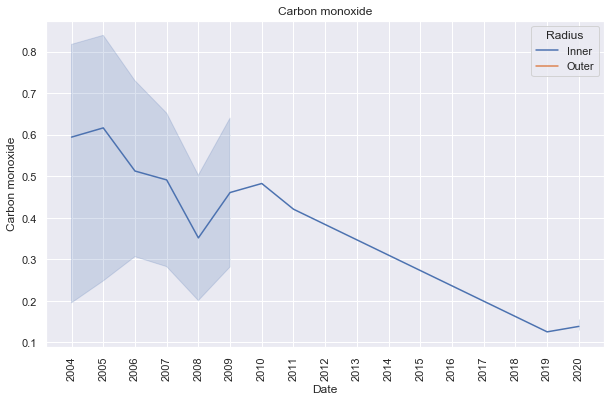

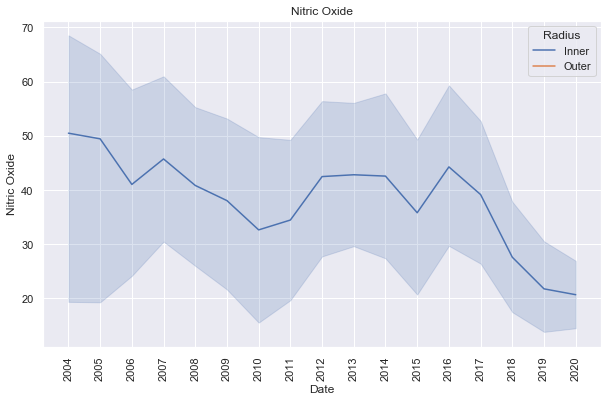

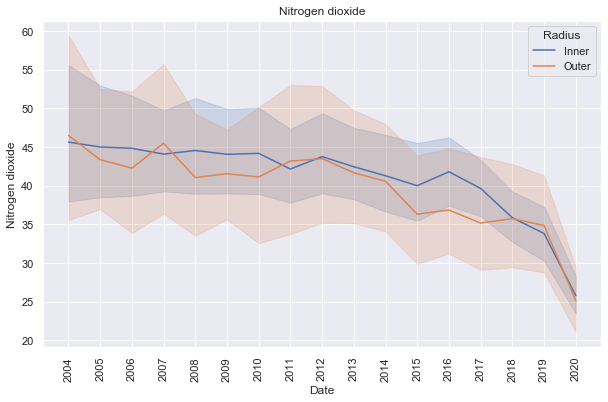

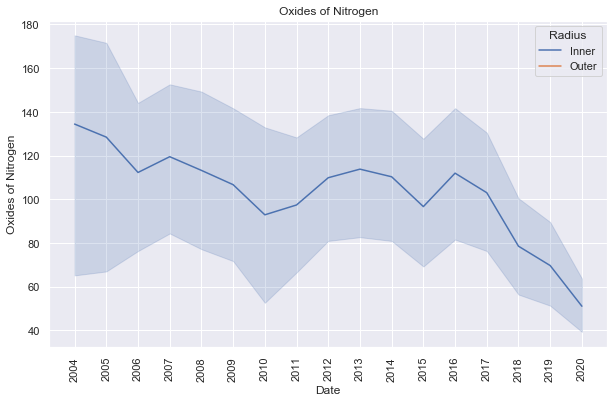

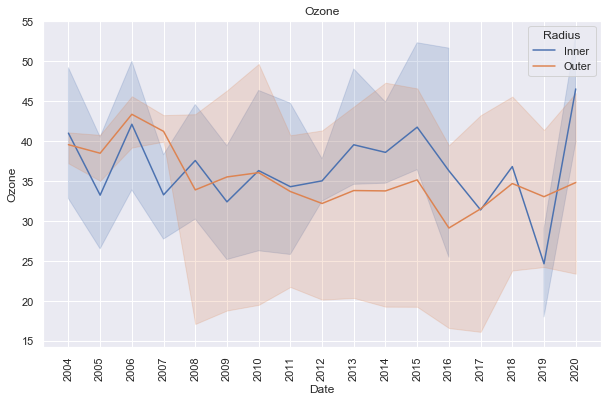

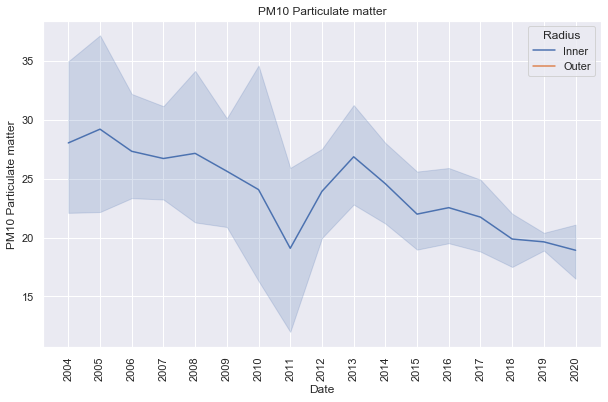

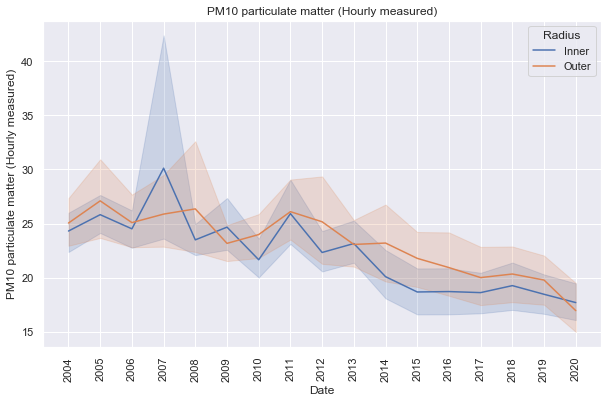

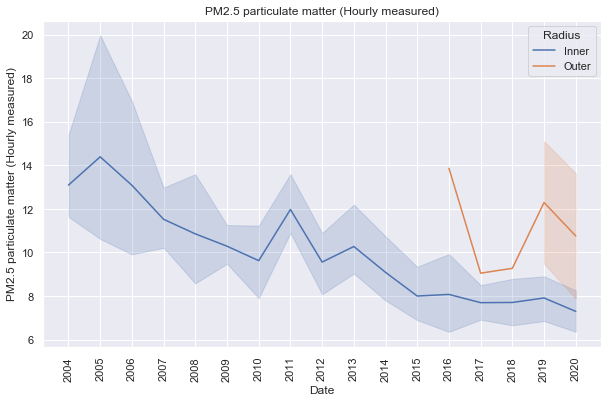

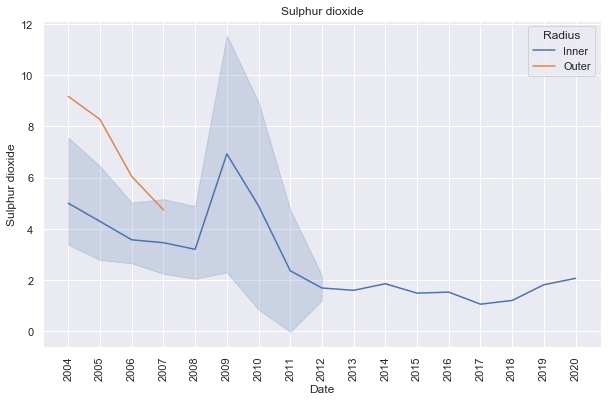

In [842]:
all_polls = list(pollution.drop(['Location', 'Date', 'CCG', 'Radius', 'lat/long', 'distance_from_LHR'], axis = 1).columns)


for p in all_polls:
    plt.figure(figsize=(10, 6))
    sns.lineplot(y= p,
                 x='Date',
                 hue = 'Radius',
                 data=pollution).set_title(p)
    plt.xticks(rotation=90)
    plt.show()

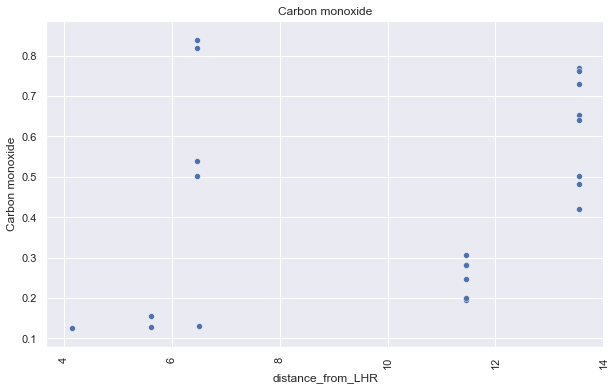

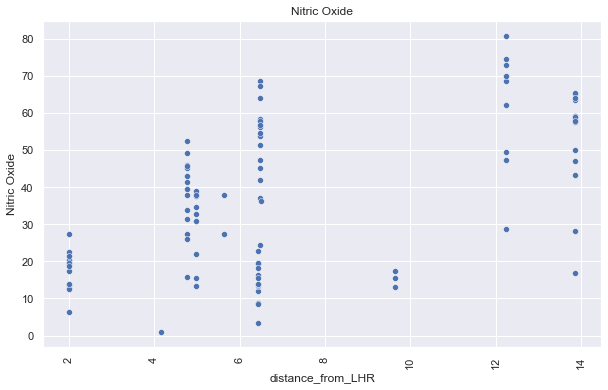

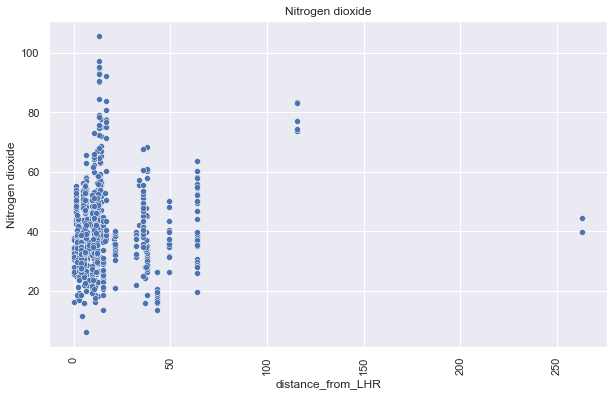

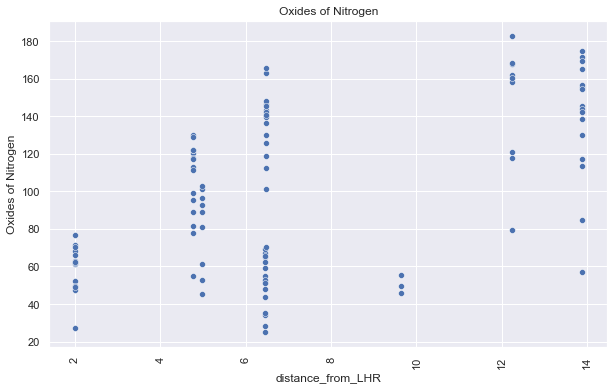

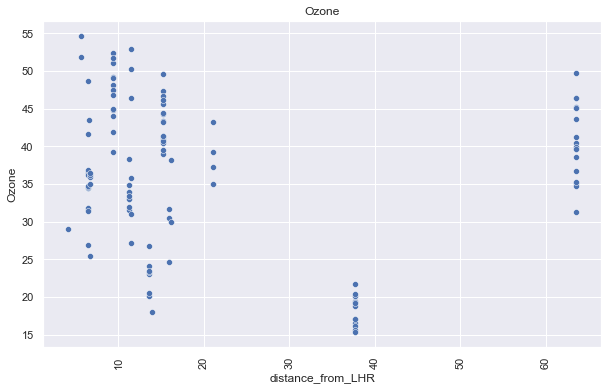

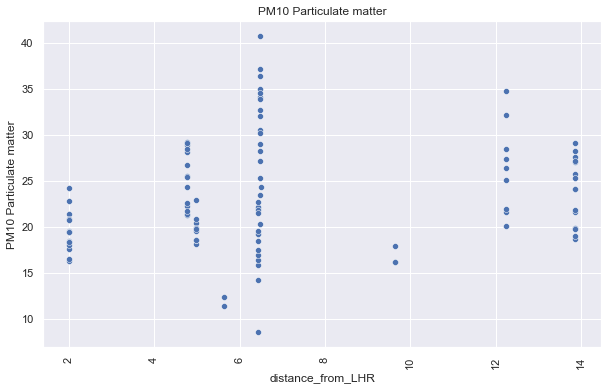

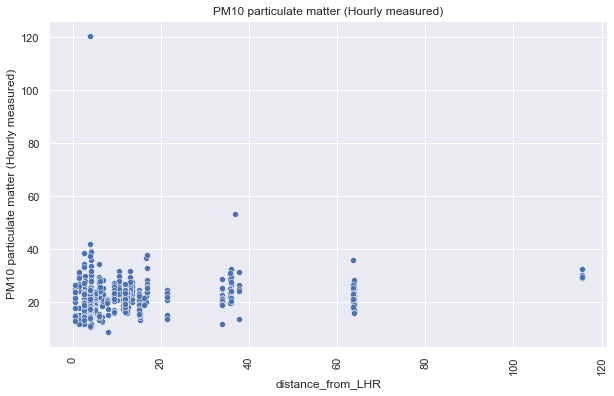

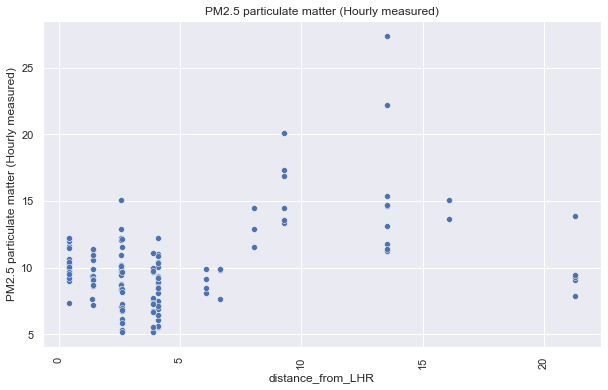

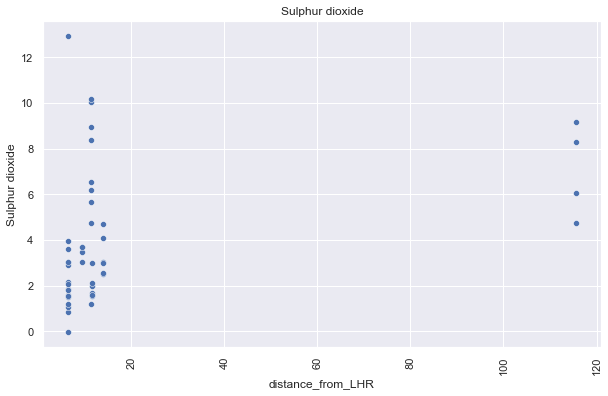

In [843]:
for p in all_polls:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(y= p,
                 x='distance_from_LHR',
                 data=pollution).set_title(p)
    plt.xticks(rotation=90)
    plt.show()

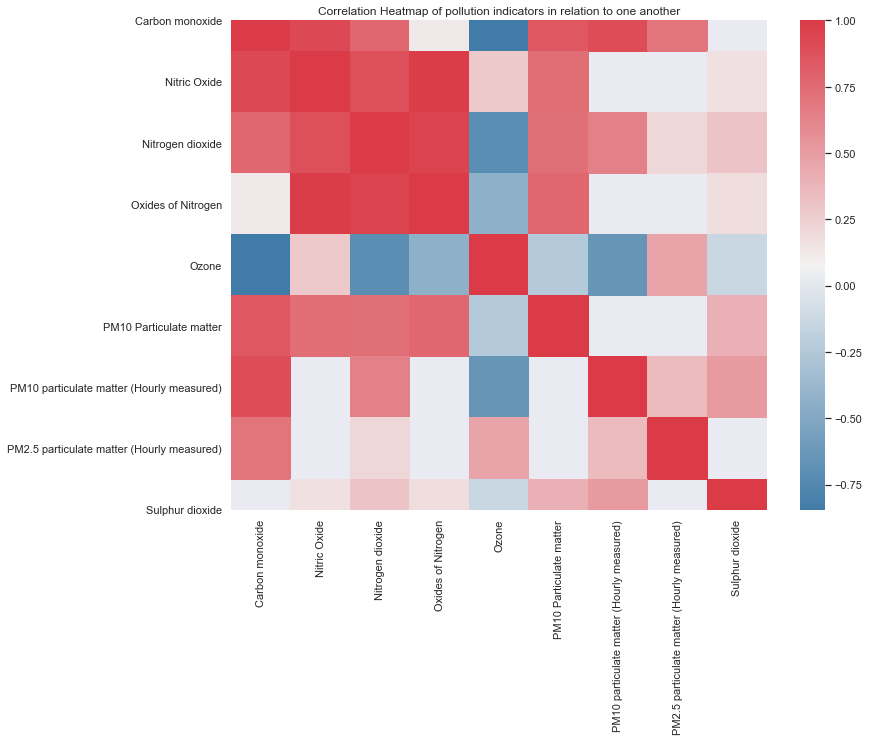

In [244]:
# lets make a correlation heatmap matrix!
sns.set(rc={'figure.figsize':(12,9)})

cmap= sns.diverging_palette(240, 10, as_cmap=True)

pollution_corr = pollution.corr()
sns.heatmap(pollution_corr, cmap=cmap)

plt.title('Correlation Heatmap of pollution indicators in relation to one another')
plt.show()

## Aggregating by CCG

In [905]:
melted_pollution[melted_pollution['Location'].str.contains('Ealing')].head(20)

Location  Date     CCG Radius  \
98              Ealing - Acton Town Hall  2004  Ealing  Inner   
99              Ealing - Acton Town Hall  2005  Ealing  Inner   
100             Ealing - Acton Town Hall  2006  Ealing  Inner   
101             Ealing - Acton Town Hall  2007  Ealing  Inner   
102             Ealing - Acton Town Hall  2008  Ealing  Inner   
103             Ealing - Acton Town Hall  2009  Ealing  Inner   
104             Ealing - Acton Town Hall  2010  Ealing  Inner   
105             Ealing - Acton Town Hall  2011  Ealing  Inner   
106             Ealing - Acton Town Hall  2012  Ealing  Inner   
107  Ealing - Acton Town Hall (Partisol)  2005  Ealing  Inner   
108  Ealing - Acton Town Hall (Partisol)  2006  Ealing  Inner   
109        Ealing - Acton Town Hall FDMS  2005  Ealing  Inner   
110        Ealing - Acton Town Hall FDMS  2006  Ealing  Inner   
111        Ealing - Acton Town Hall FDMS  2007  Ealing  Inner   
112        Ealing - Acton Town Hall FDMS  2008  Ealing  Inner   
113        Ealing - Acton Town Hall FDMS  2009  Ealing  Inner   
114        Ealing - Acton Town Hall FDMS  2010  Ealing  Inner   
115        Ealing - Acton Town Hall FDMS  2011  Ealing  Inner   
116                 Ealing - Acton Vale   2017  Ealing  Inner   
117                 Ealing - Acton Vale   2018  Ealing  Inner   

                                       lat/long  distance_from_LHR  \
98     [51.50663616079527, -0.2678132745985841]          13.538415   
99     [51.50663616079527, -0.2678132745985841]          13.538415   
100    [51.50663616079527, -0.2678132745985841]          13.538415   
101    [51.50663616079527, -0.2678132745985841]          13.538415   
102    [51.50663616079527, -0.2678132745985841]          13.538415   
103    [51.50663616079527, -0.2678132745985841]          13.538415   
104    [51.50663616079527, -0.2678132745985841]          13.538415   
105    [51.50663616079527, -0.2678132745985841]          13.538415   
106    [51.50663616079527, -0.2678132745985841]          13.538415   
107  [51.506675749015194, -0.26802731507705546]          13.525602   
108  [51.506675749015194, -0.26802731507705546]          13.525602   
109    [51.5068159264046, -0.26836391507706425]          13.508076   
110    [51.5068159264046, -0.26836391507706425]          13.508076   
111    [51.5068159264046, -0.26836391507706425]          13.508076   
112    [51.5068159264046, -0.26836391507706425]          13.508076   
113    [51.5068159264046, -0.26836391507706425]          13.508076   
114    [51.5068159264046, -0.26836391507706425]          13.508076   
115    [51.5068159264046, -0.26836391507706425]          13.508076   
116                    [51.5097107, -0.2881658]          12.319770   
117                    [51.5097107, -0.2881658]          12.319770   

           Pollutant  Indicator Value (R µg/m3)  
98   Carbon monoxide                   0.770049  
99   Carbon monoxide                   0.762150  
100  Carbon monoxide                   0.730095  
101  Carbon monoxide                   0.651978  
102  Carbon monoxide                   0.502517  
103  Carbon monoxide                   0.640032  
104  Carbon monoxide                   0.482650  
105  Carbon monoxide                   0.420783  
106  Carbon monoxide                        NaN  
107  Carbon monoxide                        NaN  
108  Carbon monoxide                        NaN  
109  Carbon monoxide                        NaN  
110  Carbon monoxide                        NaN  
111  Carbon monoxide                        NaN  
112  Carbon monoxide                        NaN  
113  Carbon monoxide                        NaN  
114  Carbon monoxide                        NaN  
115  Carbon monoxide                        NaN  
116  Carbon monoxide                        NaN  
117  Carbon monoxide                        NaN

In [850]:
pollution_wide_ccg = pollution.groupby(["CCG",'Date']).mean().drop('distance_from_LHR', axis = 1).reset_index()
pollution_wide_ccg.head()

CCG  Date  Carbon monoxide  Nitric Oxide  Nitrogen dioxide  \
0  Buckinghamshire  2020         0.138750     33.781525         33.042030   
1           Ealing  2004         0.770049           NaN         57.882938   
2           Ealing  2005         0.762150           NaN         52.862974   
3           Ealing  2006         0.730095           NaN         55.035635   
4           Ealing  2007         0.651978           NaN         54.247691   

   Oxides of Nitrogen      Ozone  PM10 Particulate matter  \
0                 NaN  49.984467                16.014508   
1                 NaN  33.992080                      NaN   
2                 NaN  28.594453                      NaN   
3                 NaN  32.527539                      NaN   
4                 NaN  28.473891                      NaN   

   PM10 particulate matter (Hourly measured)  \
0                                        NaN   
1                                  23.333576   
2                                  25.916647   
3                                  25.443425   
4                                  24.401769   

   PM2.5 particulate matter (Hourly measured)  Sulphur dioxide  
0                                         NaN              NaN  
1                                   15.391342        10.043232  
2                                   21.009842         8.370425  
3                                   18.450045         6.206311  
4                                         NaN         6.530478

In [851]:
# pollution_wide_ccg.to_csv("../data_final/pollution_wide_ccg.csv")

In [856]:
poll_vars = pollution_wide_ccg[['Date', 'CCG']]
melted_pollution_ccg = pd.melt(pollution_wide_ccg, id_vars=list(poll_vars.columns), value_vars = list(pollution_wide_ccg.drop(['Date', 'CCG'], axis = 1)), var_name = 'Pollutant', value_name = 'Indicator Value (R µg/m3)')

In [858]:
melted_pollution_ccg.head()

Date              CCG        Pollutant  Indicator Value (R µg/m3)
0  2020  Buckinghamshire  Carbon monoxide                   0.138750
1  2004           Ealing  Carbon monoxide                   0.770049
2  2005           Ealing  Carbon monoxide                   0.762150
3  2006           Ealing  Carbon monoxide                   0.730095
4  2007           Ealing  Carbon monoxide                   0.651978

In [859]:
# melted_pollution_ccg.to_csv("../data_final/melted_pollution_ccg.csv")

In [768]:
pollution_ccg_agg = melted_pollution.groupby(["CCG",'Date',"Pollutant","distance_from_LHR", 'Radius','Location']).mean().reset_index()
pollution_ccg_agg.head()

CCG  Date        Pollutant  distance_from_LHR Radius  \
0  Buckinghamshire  2020  Carbon monoxide           5.624249  Inner   
1  Buckinghamshire  2020  Carbon monoxide           5.624249  Inner   
2  Buckinghamshire  2020  Carbon monoxide           6.513180  Inner   
3  Buckinghamshire  2020     Nitric Oxide           5.624249  Inner   
4  Buckinghamshire  2020     Nitric Oxide           5.624249  Inner   

                  Location  Indicator Value (R µg/m3)  
0     Iver North Park Road                   0.155544  
1      Iver Primary School                   0.128921  
2  Iver Thorney Lane North                   0.131784  
3     Iver North Park Road                  37.798862  
4      Iver Primary School                  27.348856

In [270]:
# inner_ccg_agg.to_csv("inner_ccg_agg.csv")

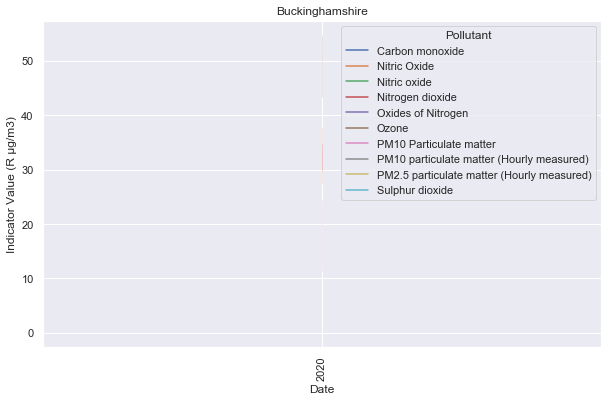

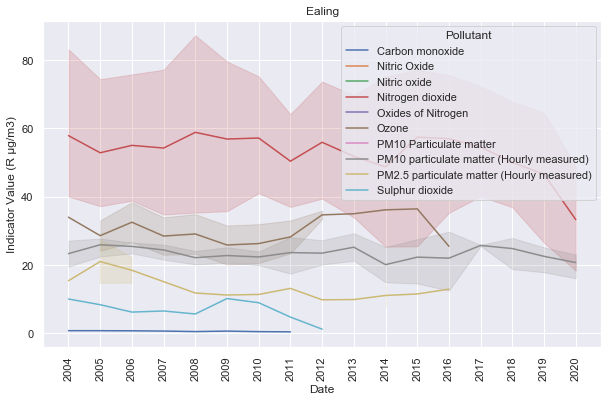

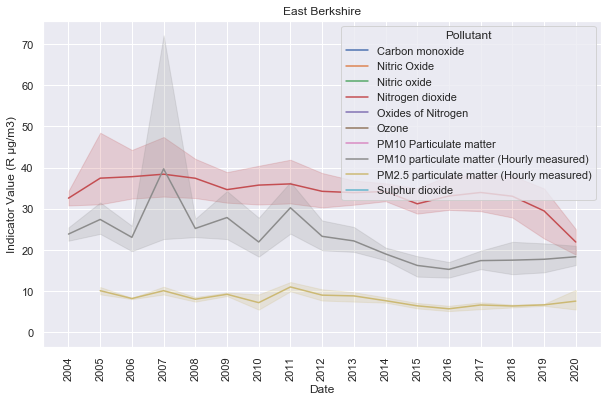

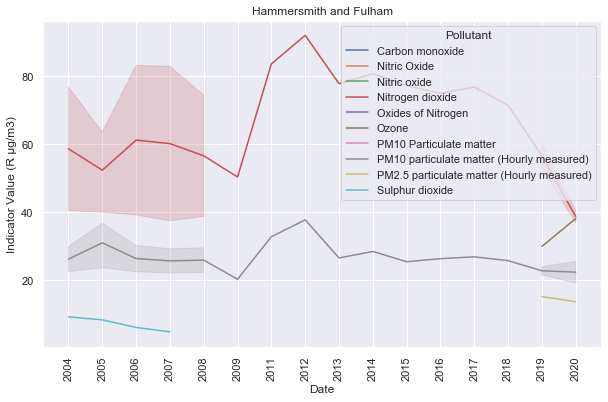

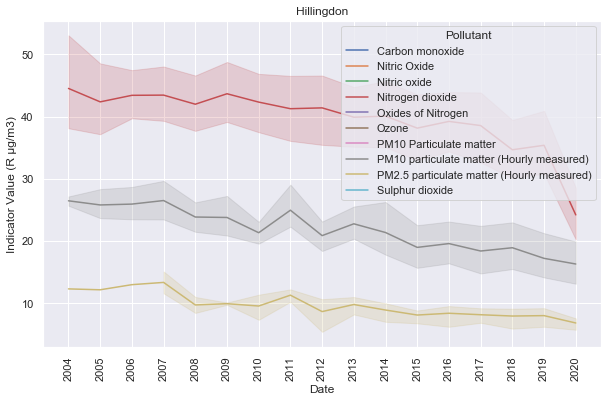

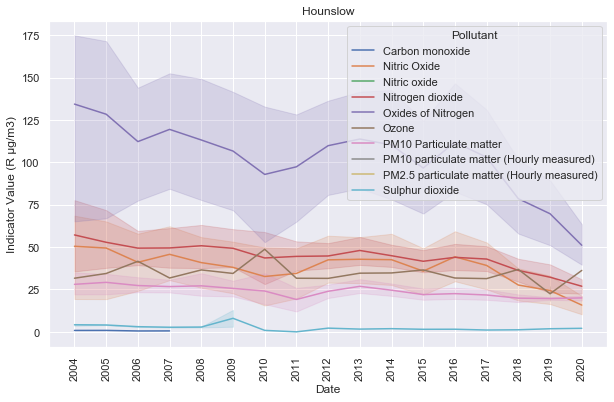

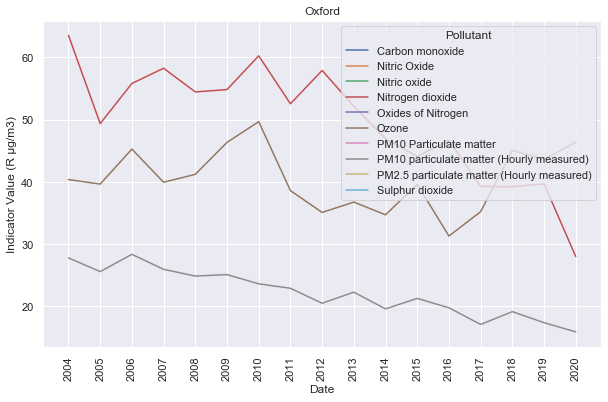

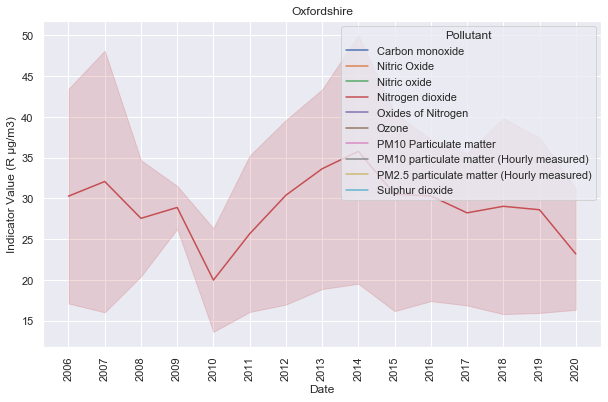

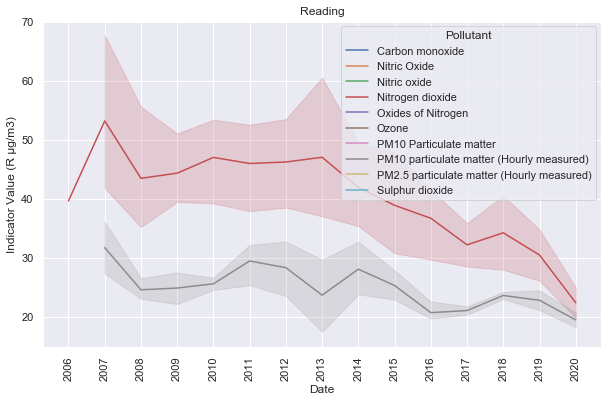

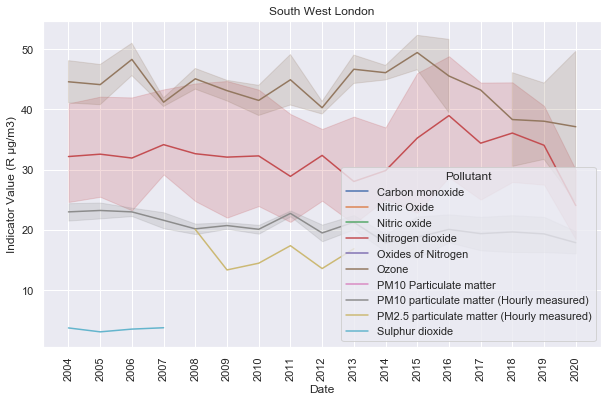

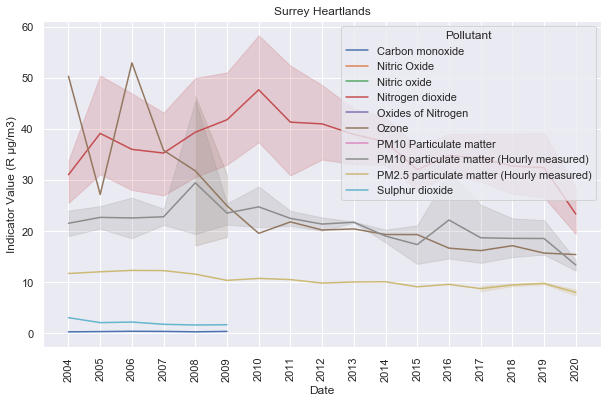

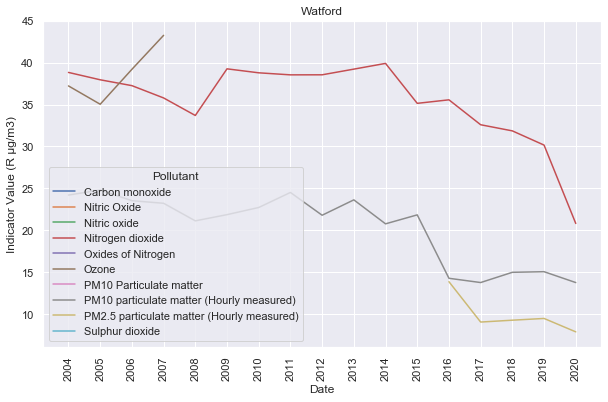

In [766]:
for l in pollution_ccg_agg['CCG'].unique():
    plt.figure(figsize=(10, 6))
    sns.lineplot(y = 'Indicator Value (R µg/m3)' ,
                 x ='Date',
                 hue = 'Pollutant',
                 data = pollution_ccg_agg[pollution_ccg_agg['CCG'] == l]).set_title(l)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
sns.scatterplot(y= p,
                 x='distance_from_LHR',
                 data=pollution).set_title(p)
    plt.xticks(rotation=90)

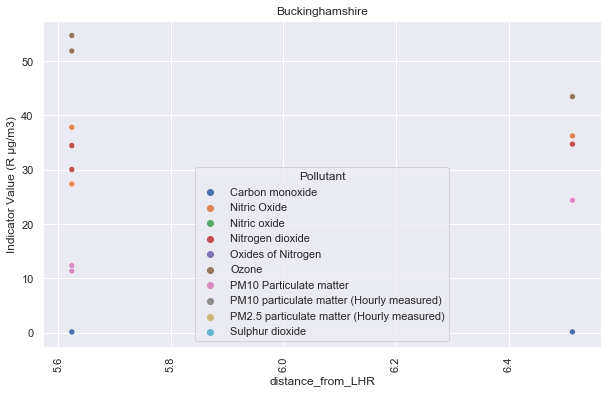

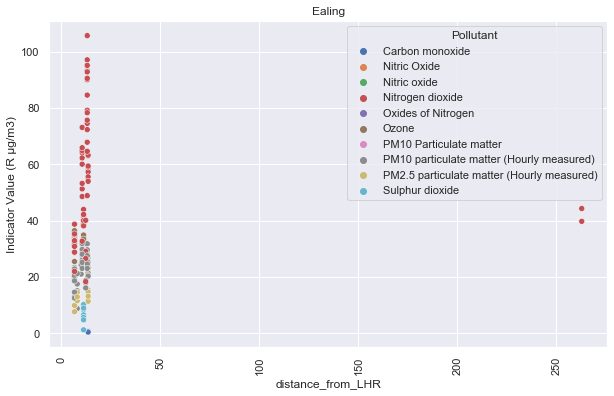

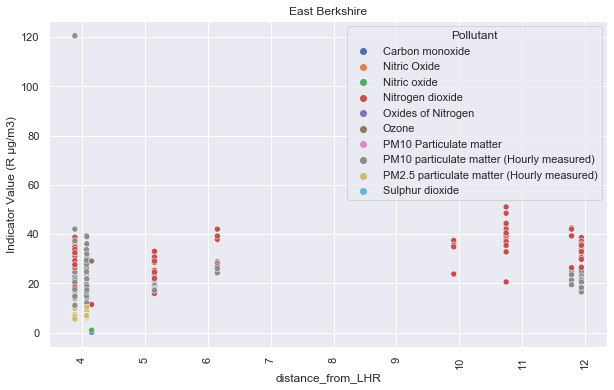

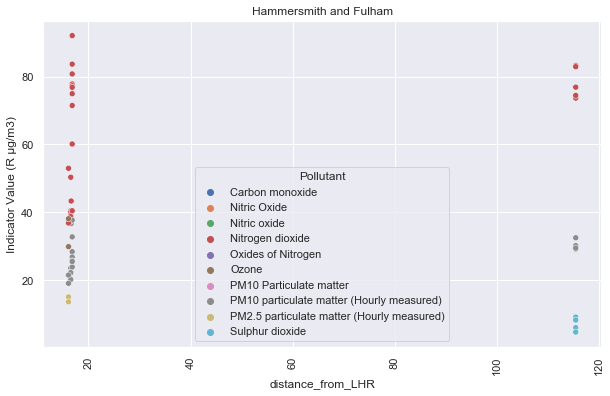

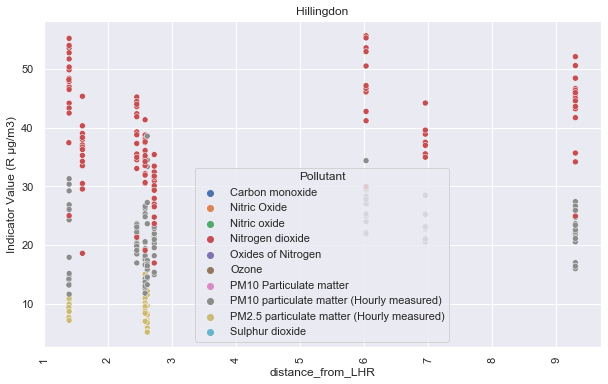

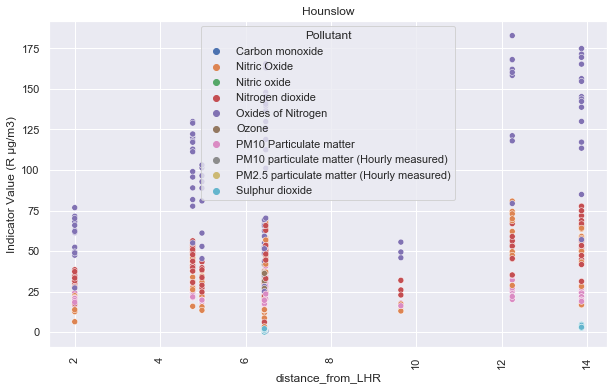

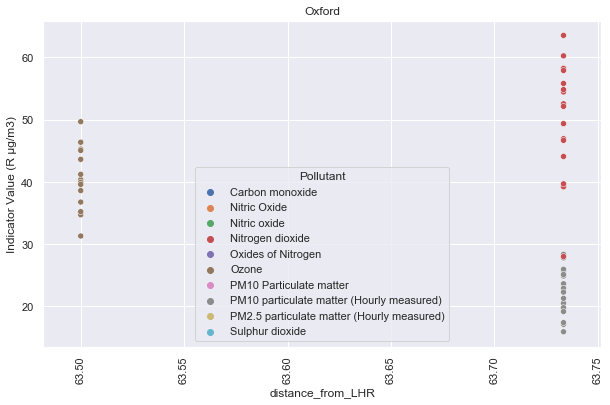

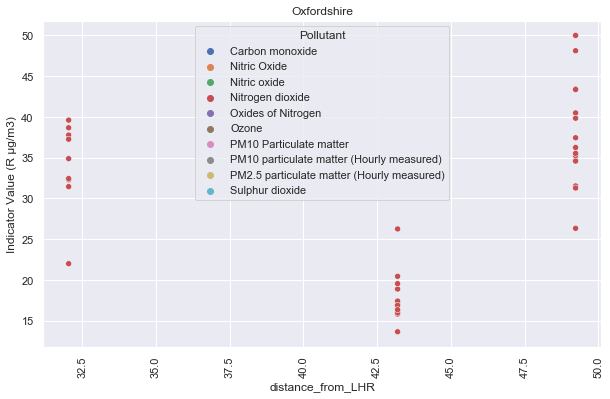

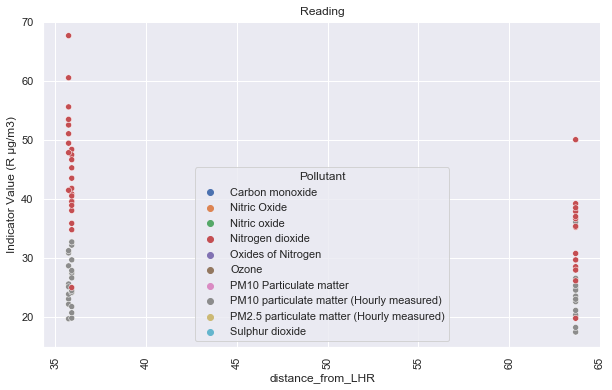

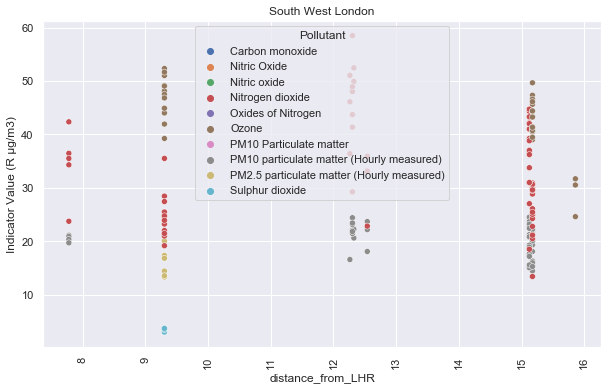

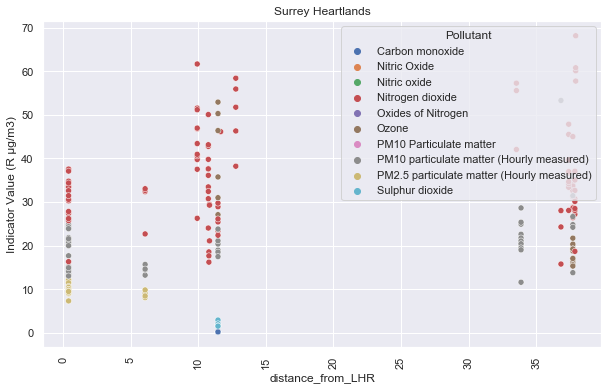

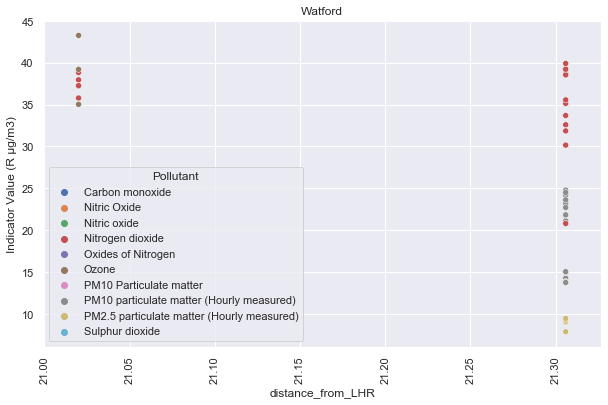

In [769]:
for l in pollution_ccg_agg['CCG'].unique():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(y = 'Indicator Value (R µg/m3)' ,
                 x ='distance_from_LHR',
                 hue = 'Pollutant',
                 data = pollution_ccg_agg[pollution_ccg_agg['CCG'] == l]).set_title(l)
    plt.xticks(rotation=90)
    plt.show()

## Looking into legal exceedance values

The annual mean concentration of NO2 must not exceed 40 µg/m3 and that there should be no more than 18 exceedances of the hourly mean limit value (concentrations above 200 µg/m3) in a single year.

An annual average of 40 µg/m3 for PM10;


A 24-hour average of 50 µg/m3 more than 35 times in a single year for PM10;


An annual average of 25 µg/m3 for PM2.5.


3-year average of 8-hour mean concentrations of O3 should not exceed 120 µg/m3 more than 25 times.


### Air Quality Standards Regulations 2010

Running 8-hourly mean  µg/m3

|Pollutant | 1 | 2 | 3 | 4 | 5 | 6 | 7|8|9|10|
|---:|:-----|:-----------|:----|:---|:---|:--|:--|:--|:--|:---|
|O3 |0 - 33|34 - 66|67 - 100|101 - 120|121 - 140|141 - 160|161 - 187|188 - 213|214 - 240|241<|
|NO2|0 - 67|68 - 134|135 - 200|201 - 267|268 - 334|335 - 400|401 - 467|468 - 534|535 - 600|601<|
|SO2|0 - 88|89 - 177|178 - 266|267 - 354|355 - 443|444 - 532|533 - 710|711 - 887|888-1064|1065 <|
|PM2.5|0 - 11|12 - 23|24 - 35|36 - 41|42 - 47|48 - 53|54 - 58|59 - 64|65 - 70|71<|
|PM10|0 - 16|17 - 33|34 - 50|51 - 58|59 - 66|67 - 75|76 - 83|84 - 91|92 - 100|101<|

In [31]:
(melted_yearly[['Pollutant','Indicator Value (R µg/m3)']])

Pollutant  Indicator Value (R µg/m3)
0     Carbon monoxide                        NaN
1     Carbon monoxide                        NaN
2     Carbon monoxide                        NaN
3     Carbon monoxide                        NaN
4     Carbon monoxide                        NaN
...               ...                        ...
4639  Sulphur dioxide                        NaN
4640  Sulphur dioxide                        NaN
4641  Sulphur dioxide                        NaN
4642  Sulphur dioxide                        NaN
4643  Sulphur dioxide                        NaN

[4644 rows x 2 columns]

In [32]:
exposure = []

for poll, value in [melted_yearly[['Pollutant','Indicator Value (R µg/m3)']]]:
        exposure.append(value)

In [499]:
exposure = []

for poll, value in melted_yearly[['Pollutant','Indicator Value (R µg/m3)']]:
    if poll == "Ozone":
    if value <= 33.00:
        exposure.append(1)
    elif 33.00 < value <= 66.00:
        exposure.append(2)
    elif 66.00 < value <= 100.00:
        exposure.append(3)
    elif 100.00 < value <= 120.00:
        exposure.append(4)
    elif 120.00 < value <= 140.00:
        exposure.append(5)
    elif 140.00 < value <= 160.00:
        exposure.append(6)
    elif 160.00 < value <= 187.00:
        exposure.append(7)
    elif 187.00 < value <= 213.00:
        exposure.append(8)
    elif 213.00 < value <= 240.00:
        exposure.append(9)
    elif 240.00 < value:
        exposure.append(10)
    else:
        exposure.append(np.nan)
    

In [475]:
exposure = []
for pollutant in melted_daily['Pollutant'].unique():
    for value in melted_daily['Indicator Value (R µg/m3)']:
        if pollutant == 'Ozone':
            if value <= 33.00:
                exposure.append(1)
            elif 33.00 < value <= 66.00:
                exposure.append(2)
            elif 66.00 < value <= 100.00:
                exposure.append(3)
            elif 100.00 < value <= 120.00:
                exposure.append(4)
            elif 120.00 < value <= 140.00:
                exposure.append(5)
            elif 140.00 < value <= 160.00:
                exposure.append(6)
            elif 160.00 < value <= 187.00:
                exposure.append(7)
            elif 187.00 < value <= 213.00:
                exposure.append(8)
            elif 213.00 < value <= 240.00:
                exposure.append(9)
            elif 240.00 < value:
                exposure.append(10)
            else:
                exposure.append(np.nan)
                
        elif pollutant == 'Nitrogen dioxide':
            if value <= 67.00:
                exposure.append(1)
            elif 67.00 < value <= 134.00:
                exposure.append(2)
            elif 134.00 < value <= 200.00:
                exposure.append(3)
            elif 200.00 < value <= 267.00:
                exposure.append(4)
            elif 267.00 < value <= 334.00:
                exposure.append(5)
            elif 334.00 < value <= 400.00:
                exposure.append(6)
            elif 400.00 < value <= 467.00:
                exposure.append(7)
            elif 467.00 < value <= 534.00:
                exposure.append(8)
            elif 534.00 < value <= 600.00:
                exposure.append(9)
            elif 600.00 < value:
                exposure.append(10)
            else:
                exposure.append(np.nan)
                
        elif pollutant == 'Sulphur dioxide':
            if value <= 88.00:
                exposure.append(1)
            elif 88.00 < value <= 177.00:
                exposure.append(2)
            elif 177.00 < value <= 266.00:
                exposure.append(3)
            elif 266.00 < value <= 354.00:
                exposure.append(4)
            elif 354.00 < value <= 443.00:
                exposure.append(5)
            elif 443.00 < value <= 532.00:
                exposure.append(6)
            elif 532.00 < value <= 710.00:
                exposure.append(7)
            elif 710.00 < value <= 887.00:
                exposure.append(8)
            elif 887.00 < value <= 1064.00:
                exposure.append(9)
            elif 1064.00 < value:
                exposure.append(10)
            else:
                exposure.append(np.nan)
            
        elif "PM2.5" in pollutant:
            if value <= 11.00:
                exposure.append(1)
            elif 11.00 < value <= 23.00:
                exposure.append(2)
            elif 23.00 < value <= 35.00:
                exposure.append(3)
            elif 35.00 < value <= 41.00:
                exposure.append(4)
            elif 41.00 < value <= 47.00:
                exposure.append(5)
            elif 47.00 < value <= 53.00:
                exposure.append(6)
            elif 53.00 < value <= 58.00:
                exposure.append(7)
            elif 58.00 < value <= 64.00:
                exposure.append(8)
            elif 64.00 < value <= 70.00:
                exposure.append(9)
            elif 70.00 < value:
                exposure.append(10)
            else:
                exposure.append(np.nan)
                
        elif "PM10" in pollutant:
            if value <= 16.00:
                exposure.append(1)
            elif 16.00 < value <= 33.00:
                exposure.append(2)
            elif 33.00 < value <= 50.00:
                exposure.append(3)
            elif 50.00 < value <= 58.00:
                exposure.append(4)
            elif 58.00 < value <= 66.00:
                exposure.append(5)
            elif 66.00 < value <= 75.00:
                exposure.append(6)
            elif 75.00 < value <= 83.00:
                exposure.append(7)
            elif 83.00 < value <= 91.00:
                exposure.append(8)
            elif 91.00 < value <= 100.00:
                exposure.append(9)
            elif 100.00 < value:
                exposure.append(10)
            else:
                exposure.append(np.nan)
        
        else:
            exposure.append(np.nan)


# melted_daily['Index Level'] = exposure

### Air Quality Standards Regulations 2010

Running 8-hourly mean  µg/m3

|Pollutant | 1 | 2 | 3 | 4 | 5 | 6 | 7|8|9|10|
|---:|:-----|:-----------|:----|:---|:---|:--|:--|:--|:--|:---|
|O3 |0 - 33|34 - 66|67 - 100|101 - 120|121 - 140|141 - 160|161 - 187|188 - 213|214 - 240|241<|
|NO2|0 - 67|68 - 134|135 - 200|201 - 267|268 - 334|335 - 400|401 - 467|468 - 534|535 - 600|601<|
|SO2|0 - 88|89 - 177|178 - 266|267 - 354|355 - 443|444 - 532|533 - 710|711 - 887|888-1064|1065 <|
|PM2.5|0 - 11|12 - 23|24 - 35|36 - 41|42 - 47|48 - 53|54 - 58|59 - 64|65 - 70|71<|
|PM10|0 - 16|17 - 33|34 - 50|51 - 58|59 - 66|67 - 75|76 - 83|84 - 91|92 - 100|101<|

In [476]:
len(exposure)

39593700

In [477]:
len(melted_daily)

2639580